## **General code to support light curves project. Exploring Exoplanets: Experimental Models and Graphic Narratives.**

In [28]:
#import of necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.axis import Tick
import matplotlib.ticker as mtick
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)


In [29]:
#Conect data from Drive account
from google.colab import drive
drive.mount('/content/drive')
!ln -s drive/MyDrive/Astrobiology_stars_model LCE #drive directory of the data being executed

Mounted at /content/drive


GENERAL MODEL TO USE IN THE RESPECTIVE ASSEMBLY

Third Kepler Law:

$ T^2 = a^3  $

With $T$: Translation period and $a$: semimajor axis.

Relationship between body sizes and light intensities::

$    \frac{I_{tr}}{I}=1-\frac{r^2}{R^2} $

With:
$I_{tr}$:transmitted light intensity

$I$: star intensity

$r$: exoplanet radius

$R$: star radius.

With this expression we can find a relationship of the difference in radii ($m$) between the star and the exoplanet in the assembly:

$   \frac{r}{R}=\sqrt{1-\frac{I_{tr}}{I}}=m      $

Then, the size of the exoplanet will be given by:

$r = Rm$

Deduction of model used before  $\frac{I_{tr}}{I}$.

The proposed problem can be summarized as follows:

An exoplanet of radio $\rho'$ eclipses a star of radio $\rho$ by decreasing its brightness at the rate $ \frac{I_{tr}}{I}$. The star is at a distance $R$ from the light curve detection camera. How can we find a relationship between star/exoplanet sizes from the data given in the light curve $ \frac{I_{tr}}{I}$?

The brightness of a star from Gauss's law for luminous flux is given by the equation:

$I =\frac{L_v}{4\pi R^2}$

Where:

$L_v = \sigma \tau^4 2 \pi \rho^2=\alpha 2 \pi \rho^2$

This expression refers to the luminosity of a point on the stellar surface of a star of radius $r$ with a surface temperature $T$ according to the Stefan-Boltzmann law, multiplied by the surface of the star remaining in the observer's line of sight. $\sigma$ is the Boltzmann constant. Given the geometric approach of the problem to be solved, we reduce this parameter by proposing it as a constant value $\alpha$.

The brightness or intensity incident on the camera will then be given by:

$I = \frac{\alpha 2 \pi \rho^2}{4\pi R^2} = \frac{\alpha \rho^2}{2R^2}$

During an eclipse the drop in a star's luminosity due to an exoplanet, which can be approximated as half a spherical object from the observer's perspective, is given as:

$ L = \alpha 2 \pi r^2 \rho^2-\alpha 2 \pi r^2 \rho'^2\$

$L = 2 \pi \alpha (\rho^2-\rho'^2)$

Assuming that eclipsing occurs for bodies that are approximately the same distance from the observer, the transmitted light intensity can be calculated as:


$I_{tr} = \frac{2 \pi \alpha (\rho^2-\rho'^2)}{4\pi R^2}= \frac{\alpha (\rho^2-\rho'^2)}{2R^2}$

And the reason searched as:

$\frac{I_{tr}}{I}= \frac{\alpha (\rho^2-\rho'^2)}{2R^2} \frac{2R^2}{\alpha \rho^2}$

 $ \frac{I_{tr}}{I}= \frac{ \rho^2-\rho'^2}{\rho^2} = 1- \frac{\rho'^2}{\rho^2}$

Finally, the previous equation accounts for the light transmission rate for an object of radius $\rho'$ eclipsing a star of radio $\rho$


## **Test data obtained during assembly using ASJ**

In [30]:
#Charging data
LCP1 = pd.read_csv('LCE/LC/LCP1.csv')
LCP2 = pd.read_csv('LCE/LC/LCP2.csv')
LCP3 = pd.read_csv('LCE/LC/LCP3.csv')
LCP4 = pd.read_csv('LCE/LC/LCP4.csv')
LCP5 = pd.read_csv('LCE/LC/LCP5.csv')

## **Data visualization**

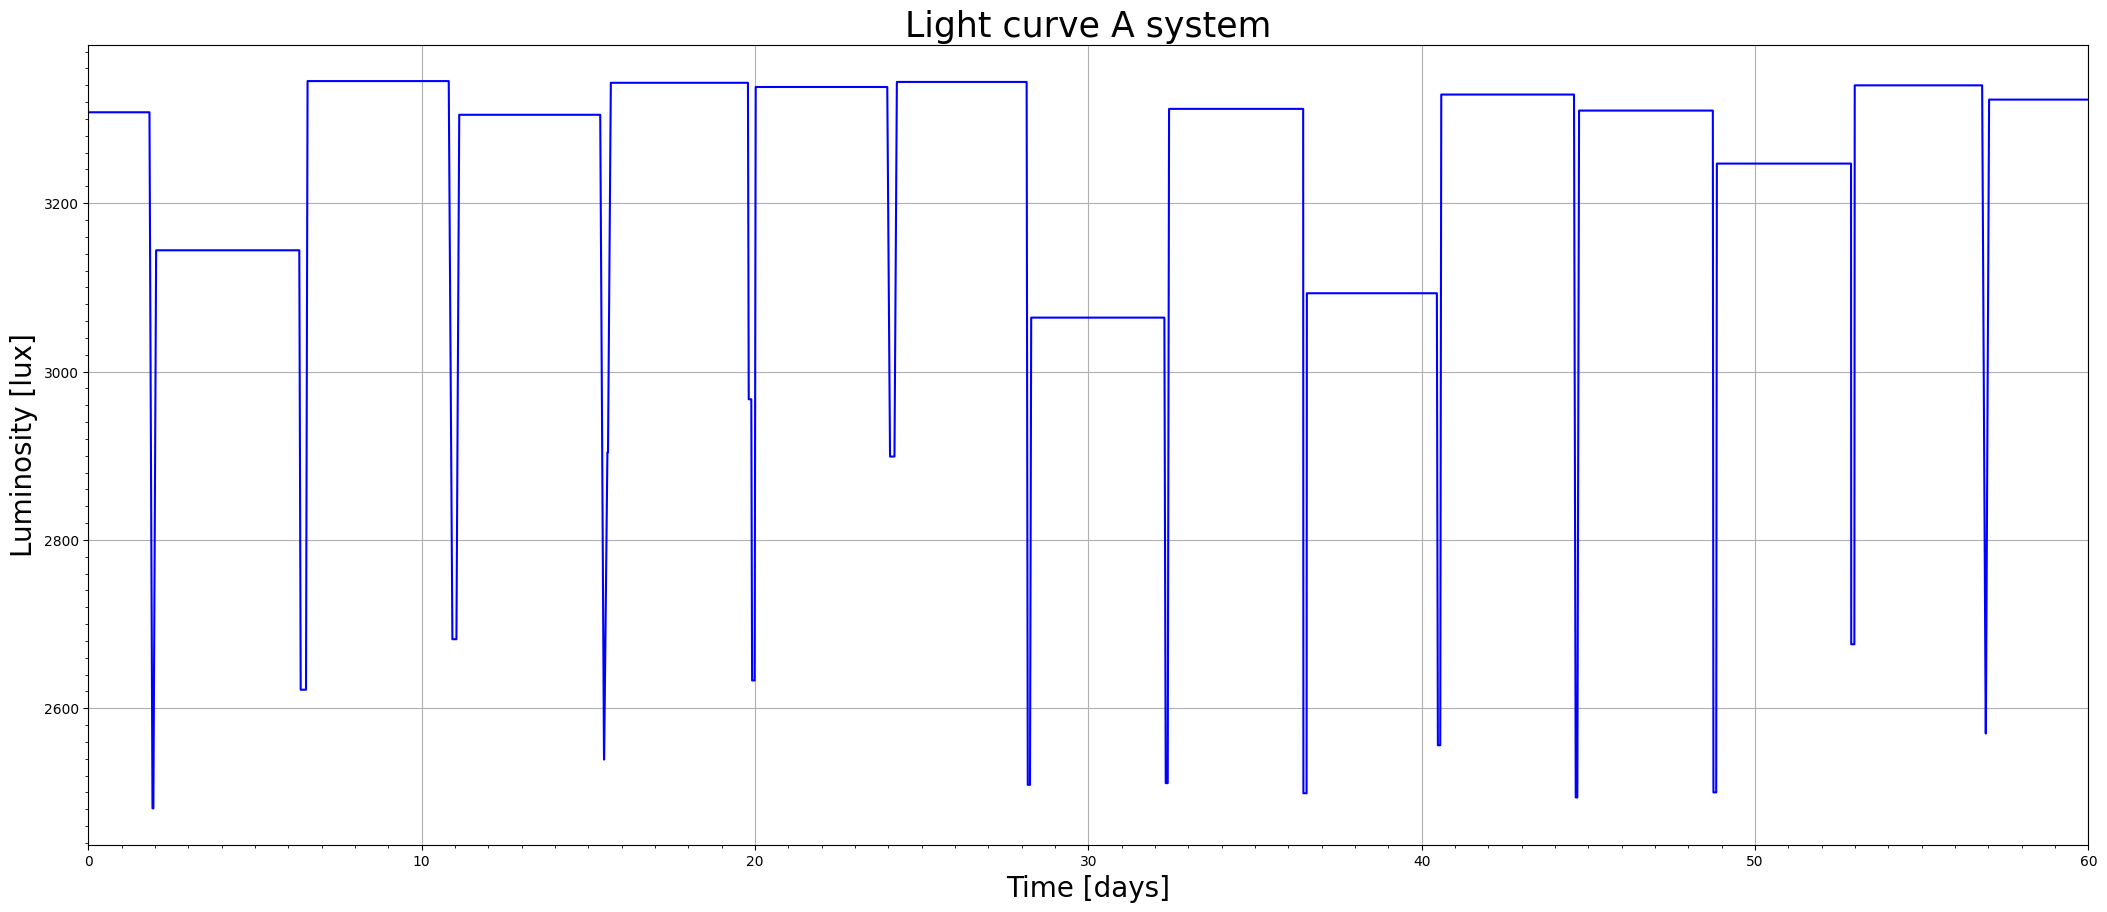

In [31]:
figure = plt.figure(figsize=(20,8))
ax = figure.add_axes([0,0,1,1])

ax.plot(LCP1['relative_time']/1000, LCP1['AmbientLightSensor'], color='blue', label='Sistema A')
#ax.vlines(jejeji[:,0]/1000, 2400,2500, colors='black')
ax.set_xlabel('Time [days]', size=20)
ax.set_ylabel('Luminosity [lux]', size=20)
ax.set_xlim(0,60)
ax.set_title('Light curve A system', size=25)
ax.yaxis.set_major_locator(MultipleLocator(200))
ax.yaxis.set_minor_locator(MultipleLocator(20))
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.grid()
#ax.legend(loc='lower right', markerscale=50, fontsize=20)

Lomb Scargle periodograms incorporated into teaching high-level students light curves analysi.

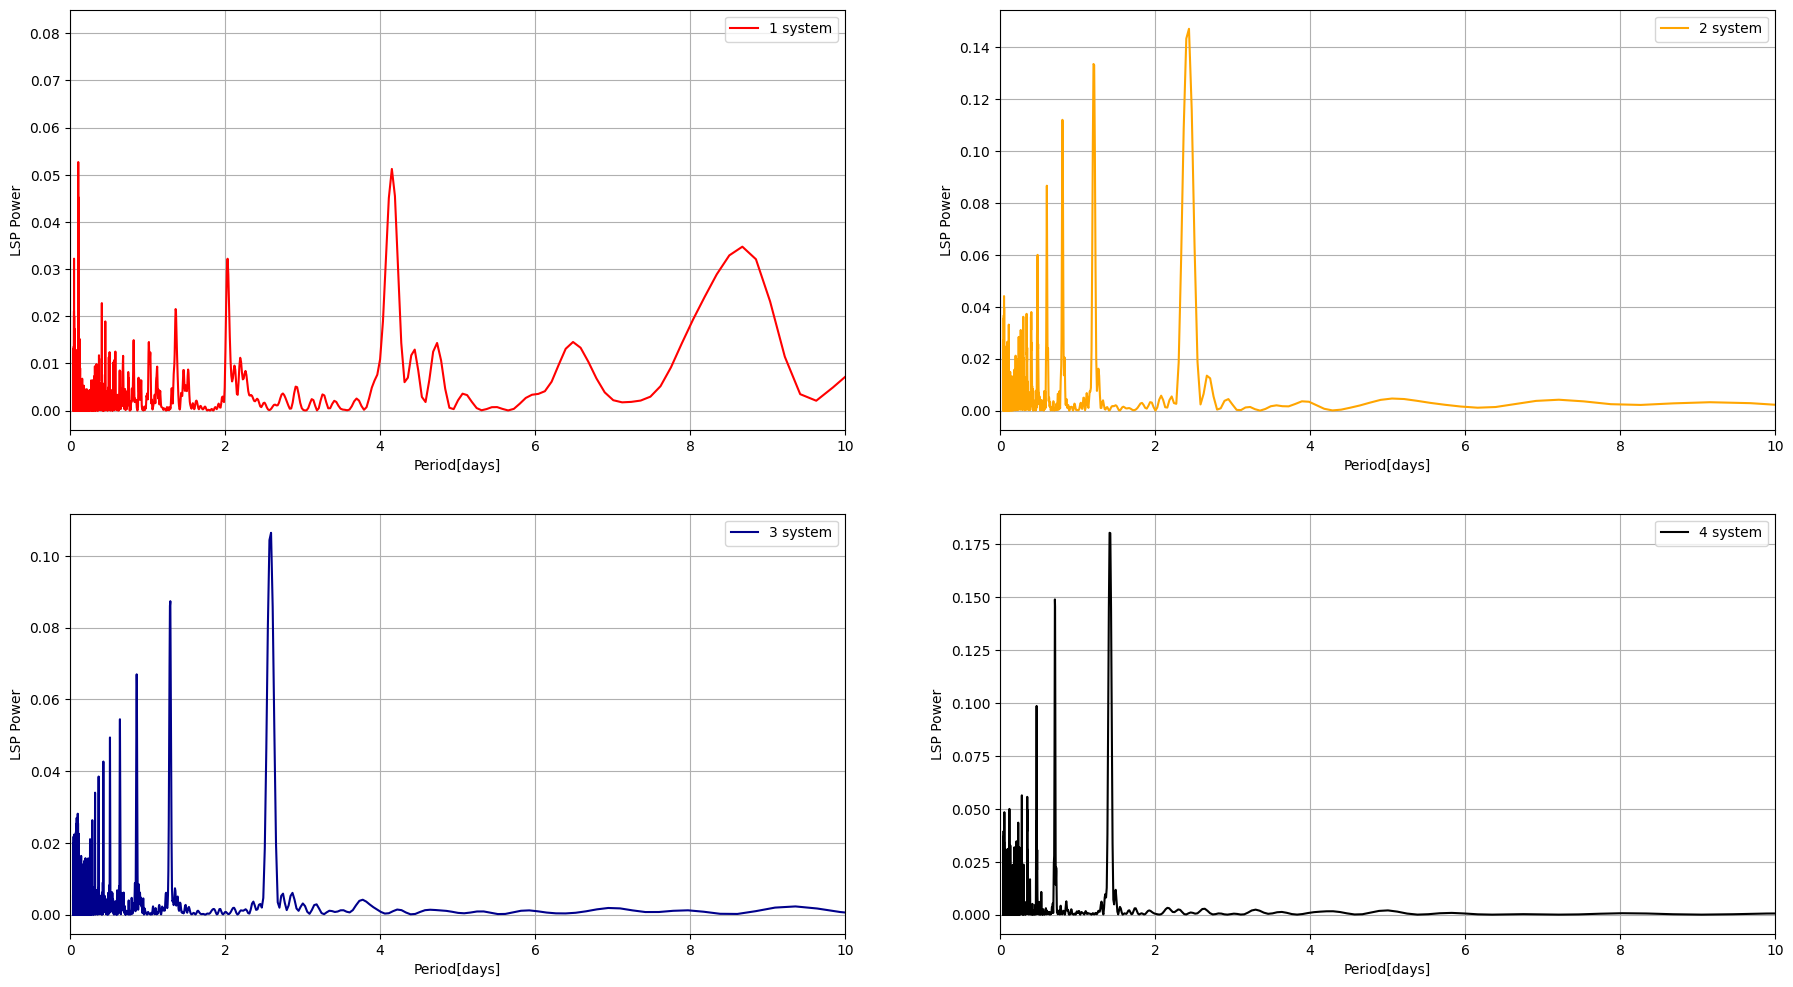

In [32]:
from astropy.timeseries import LombScargle
from scipy.signal import periodogram
from astropy import units as u

f1, p1 = LombScargle(LCP1['relative_time']/1000, (LCP1['AmbientLightSensor'])).autopower()
f2, p2 = LombScargle(LCP2['relative_time']/1000, (LCP2['AmbientLightSensor'])).autopower()
f3, p3 = LombScargle(LCP3['relative_time']/1000, (LCP3['AmbientLightSensor'])).autopower()
f4, p4 = LombScargle(LCP4['relative_time']/1000, (LCP4['AmbientLightSensor'])).autopower()

plt.figure(figsize=(22,12))

plt.subplot(221)
plt.plot(1/f1,p1, color='red', label='1 system')
plt.xlim(0,10)
plt.xlabel('Period[days]')
plt.ylabel('LSP Power')
plt.grid()
plt.legend()

plt.subplot(222)
plt.plot(1/f2,p2, color='orange', label='2 system')
plt.xlim(0,10)
plt.xlabel('Period[days]')
plt.ylabel('LSP Power')
plt.grid()
plt.legend()

plt.subplot(223)
plt.plot(1/f3,p3, color='darkblue', label='3 system')
plt.xlim(0,10)
plt.xlabel('Period[days]')
plt.ylabel('LSP Power')
plt.grid()
plt.legend()

plt.subplot(224)
plt.plot(1/f4,p4, color='black', label='4 system')
plt.xlim(0,10)
plt.xlabel('Period[days]')
plt.ylabel('LSP Power')
plt.grid()
plt.legend()



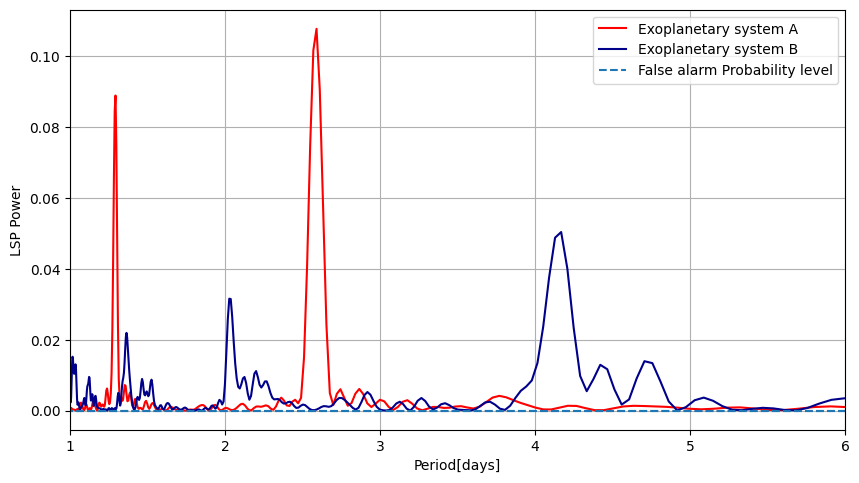

In [33]:
f_1, p_1 = LombScargle(LCP3['relative_time']/1000,
                     (LCP3['AmbientLightSensor'])).autopower(minimum_frequency=0.16, maximum_frequency=1)
f_2, p_2 = LombScargle(LCP1['relative_time']/1000,
                     (LCP1['AmbientLightSensor'])).autopower(minimum_frequency=0.16, maximum_frequency=1)


#Noise_umbral analysis
ls1 = LombScargle(LCP3['relative_time']/1000, (LCP3['AmbientLightSensor']))
ls_false1 = ls1.false_alarm_probability(p_1.max(), method='baluev')

ls2 = LombScargle(LCP1['relative_time']/1000, (LCP1['AmbientLightSensor']))
ls_false2 = ls2.false_alarm_probability(p_2.max(), method='baluev')


plt.figure(figsize=(22,12))

plt.subplot(221)
plt.plot(1/f_1,p_1, color='red', label='Exoplanetary system A')
plt.hlines(ls_false1, linestyles='dashed', xmin=0, xmax=6)
plt.xlim(1,6)
plt.xlabel('Period[days]')
plt.ylabel('LSP Power')
plt.plot(1/f_2,p_2, color='darkblue', label='Exoplanetary system B')
plt.hlines(ls_false2, linestyles='dashed', xmin=0, xmax=6, label='False alarm Probability level')
plt.xlim(1,6)
plt.xlabel('Period[days]')
plt.ylabel('LSP Power')
plt.grid()
plt.legend()


In [34]:
probabilities = [0.1, 0.5, 0.01]
ls1.false_alarm_level(probabilities), ls2.false_alarm_level(probabilities)


(array([0.03219684, 0.02640788, 0.03930021]),
 array([0.02565076, 0.02114225, 0.03119394]))

In [35]:
#Frecuencias de picos máximos
index1 = np.argmax(p1)
peak_frequency1 = f_1[index1]

index2 = np.argmax(p2)
peak_frequency2 = f_2[index2]

print('period_peak Exoplanetary system A:',1/peak_frequency1,'days')
print('period_peak Exoplanetary system B:',1/peak_frequency2,'days')

period_peak Exoplanetary system A: 4.7722315485831155 days
period_peak Exoplanetary system B: 3.149623281762236 days


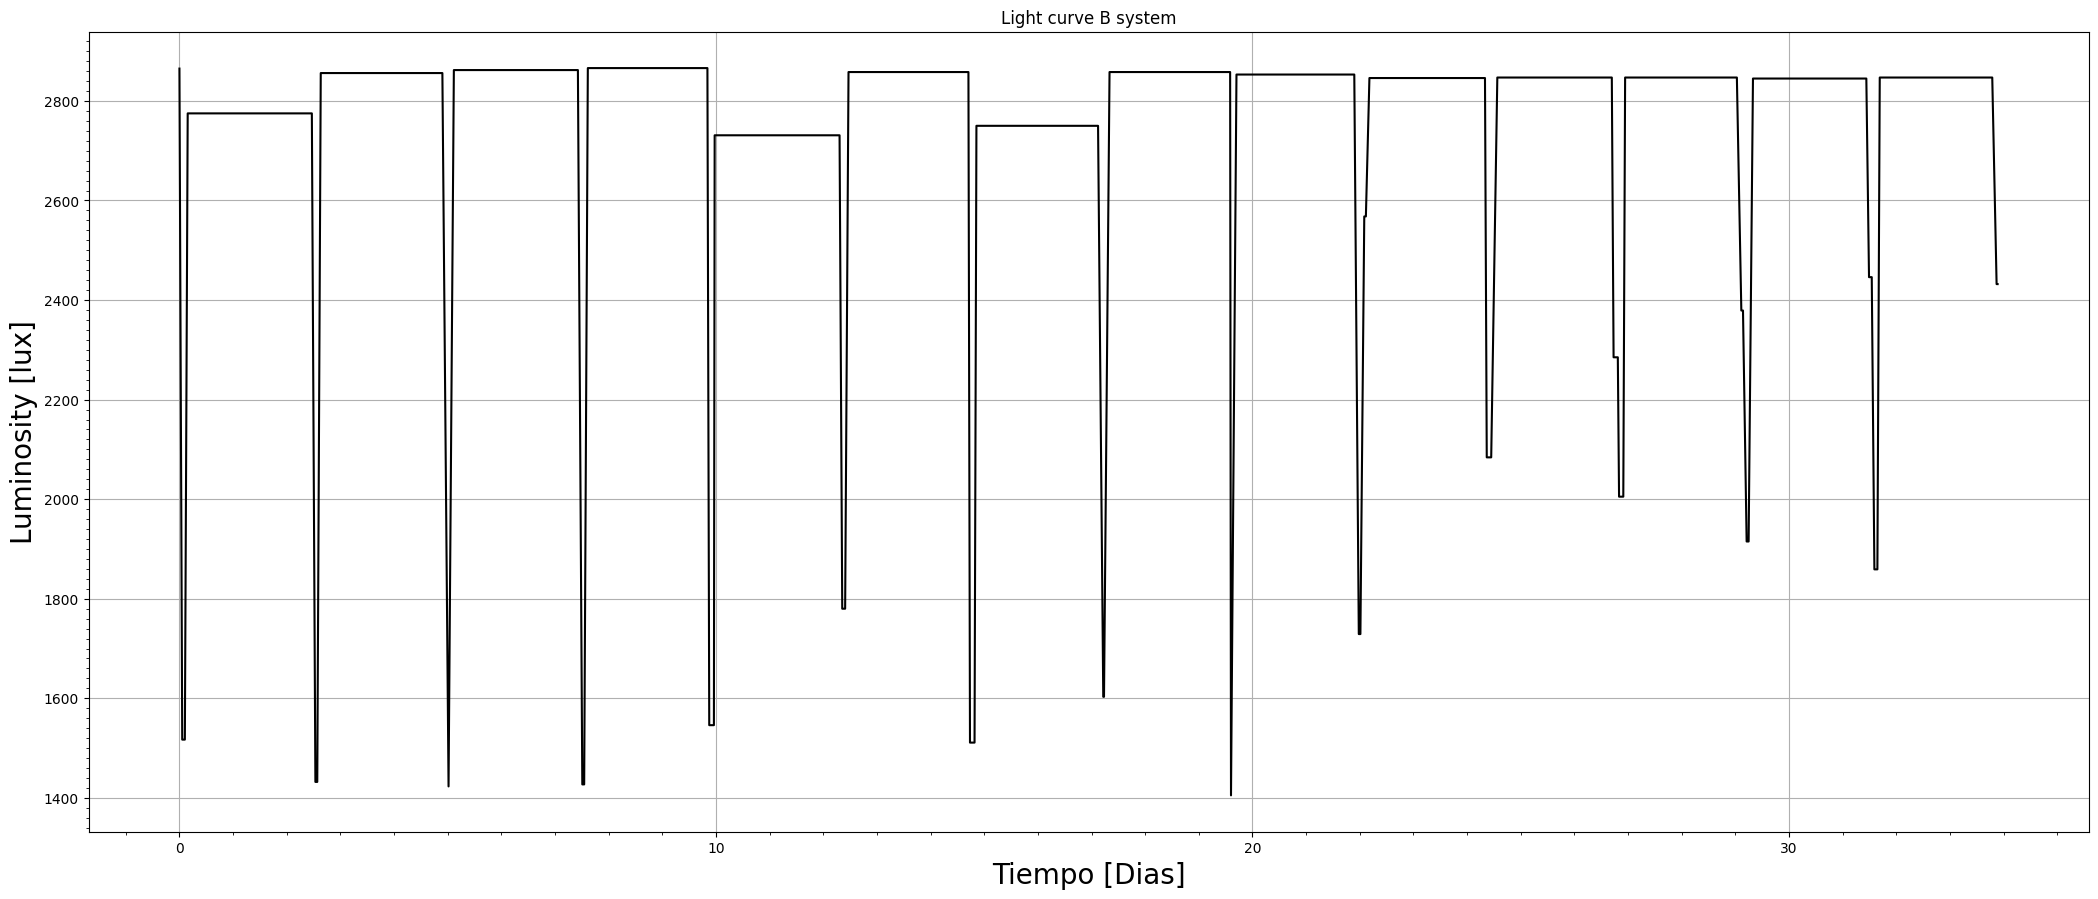

In [36]:
figure = plt.figure(figsize=(20,8))
bx = figure.add_axes([0,0,1,1])

bx.plot(LCP2['relative_time']/1000, LCP2['AmbientLightSensor'], color='black')
bx.set_xlabel('Tiempo [Dias]', size=20)
bx.set_ylabel('Luminosity [lux]', size=20)
bx.set_title('Light curve B system')
bx.yaxis.set_major_locator(MultipleLocator(200))
bx.yaxis.set_minor_locator(MultipleLocator(20))
bx.xaxis.set_major_locator(MultipleLocator(10))
bx.xaxis.set_minor_locator(MultipleLocator(1))
bx.grid()

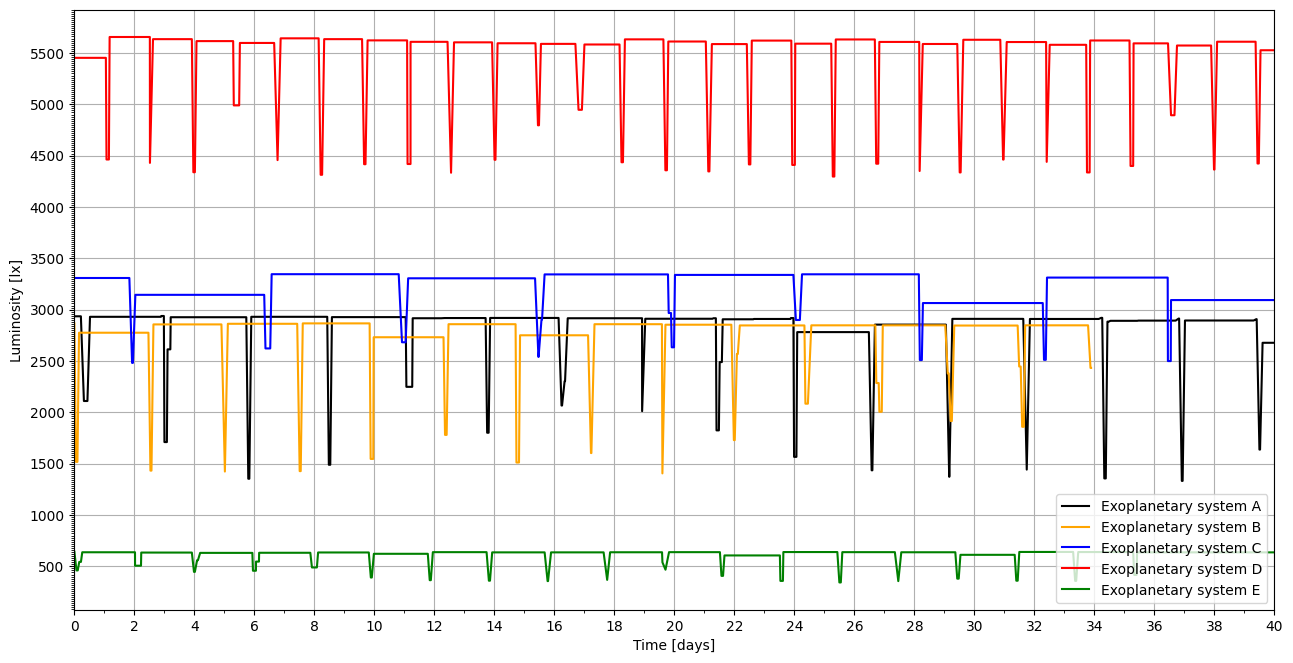

In [37]:
figure = plt.figure(figsize=(12,6))
ax = figure.add_axes([0,0,1,1])

ax.plot(LCP3['relative_time']/1000, LCP3['AmbientLightSensor'], color='black', label='Exoplanetary system A')
ax.plot(LCP2['relative_time']/1000, LCP2['AmbientLightSensor'], color='orange', label='Exoplanetary system B')
ax.plot(LCP1['relative_time']/1000, LCP1['AmbientLightSensor'], color='blue', label='Exoplanetary system C')
ax.plot(LCP4['relative_time']/1000, LCP4['AmbientLightSensor'], color='red', label='Exoplanetary system D')
ax.plot(LCP5['relative_time']/1000, LCP5['AmbientLightSensor'], color='green', label='Exoplanetary system E')
ax.set_xlabel('Time [days]', size=10)
ax.set_ylabel('Luminosity [lx]', size=10)
ax.set_xlim(0,40)
ax.yaxis.set_major_locator(MultipleLocator(500))
ax.yaxis.set_minor_locator(MultipleLocator(20))
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.grid()
ax.legend(loc='lower right', markerscale=10, fontsize=10)

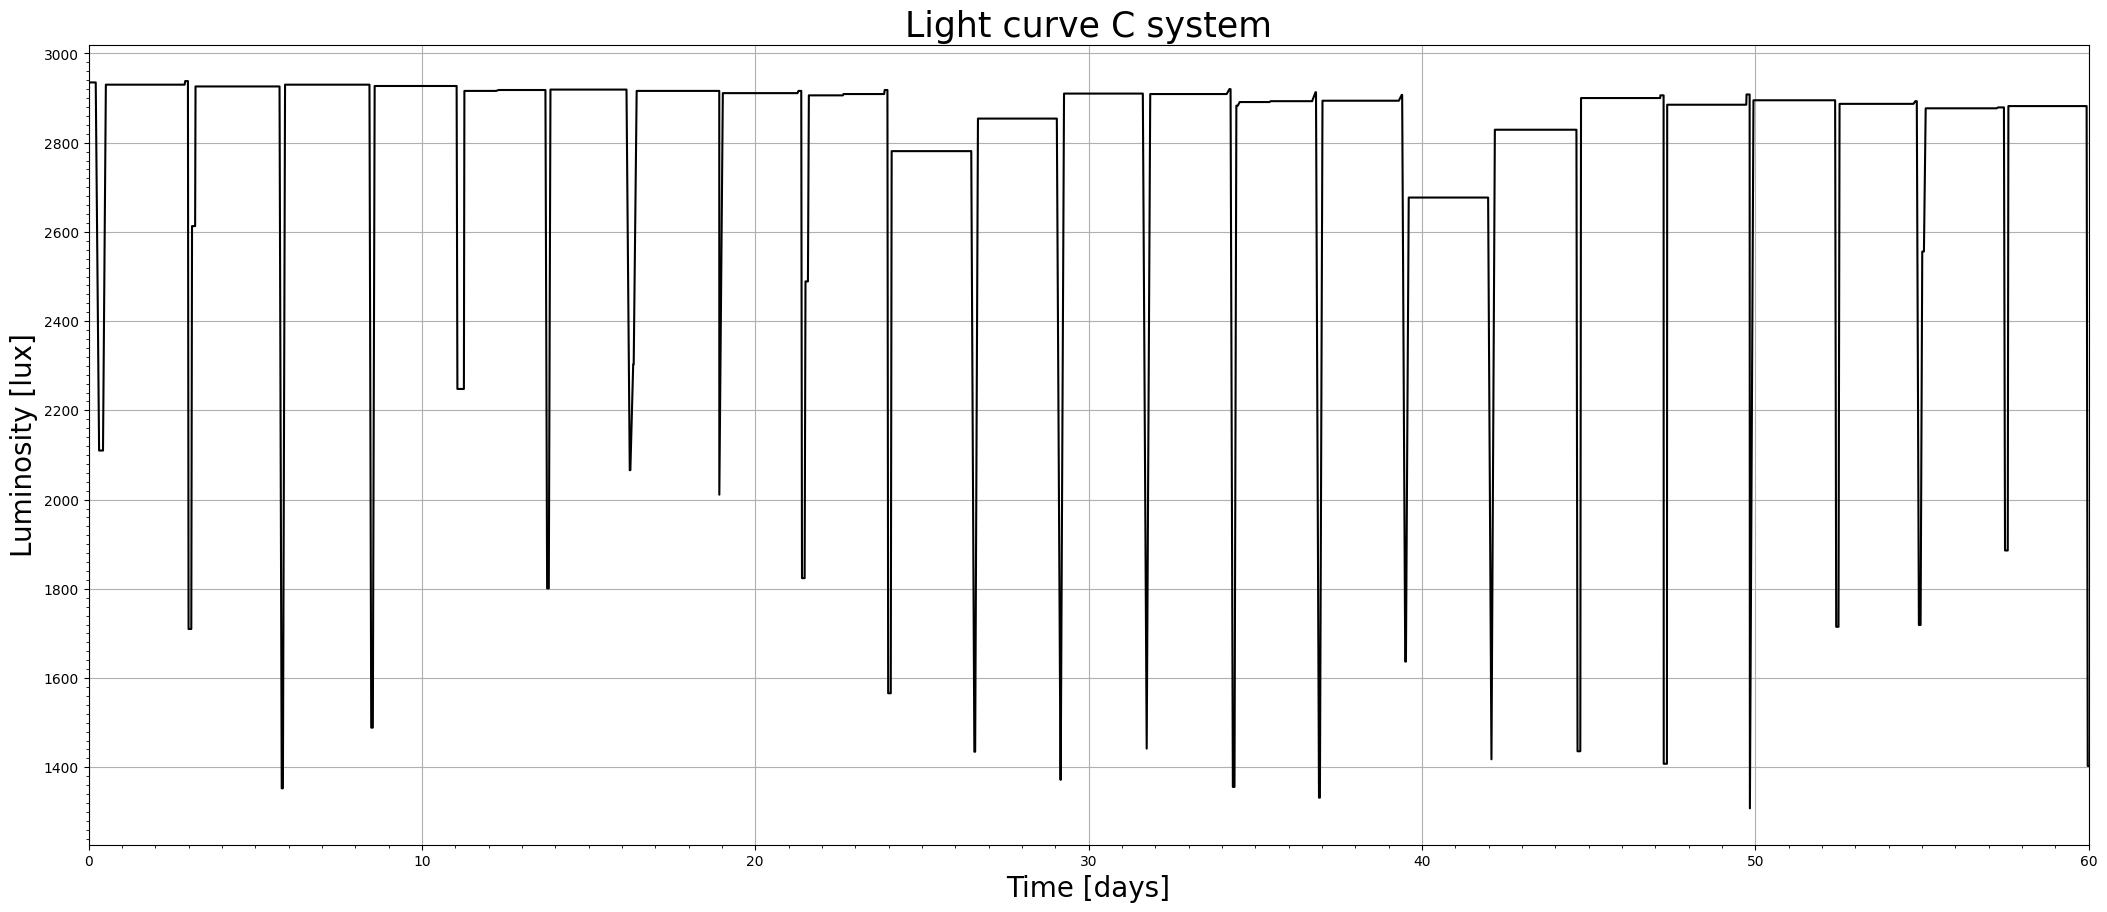

In [38]:
figure = plt.figure(figsize=(20,8))
ax = figure.add_axes([0,0,1,1])

ax.plot(LCP3['relative_time']/1000, LCP3['AmbientLightSensor'], color='black')
ax.set_xlabel('Time [days]', size=20)
ax.set_ylabel('Luminosity [lux]', size=20)
ax.set_xlim(0,60)
ax.set_title('Light curve C system', size=25)
ax.yaxis.set_major_locator(MultipleLocator(200))
ax.yaxis.set_minor_locator(MultipleLocator(20))
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.grid()

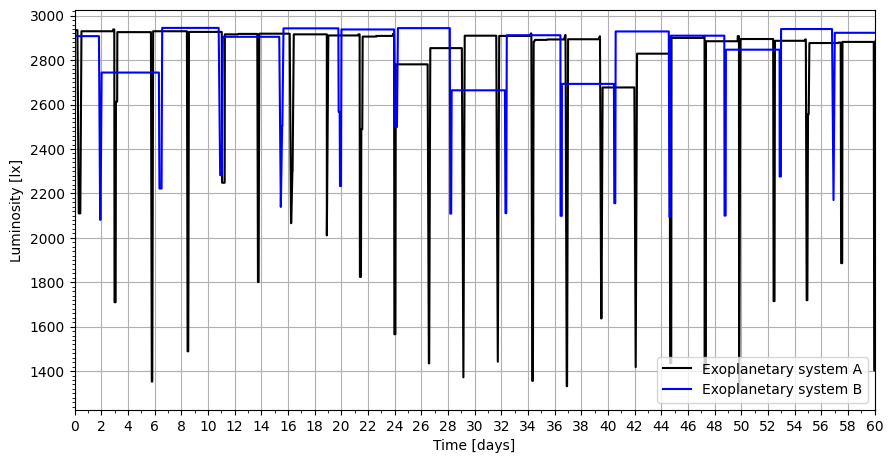

In [39]:
figure = plt.figure(figsize=(8,4))
ax = figure.add_axes([0,0,1,1])

ax.plot(LCP3['relative_time']/1000, LCP3['AmbientLightSensor'], color='black', label='Exoplanetary system A')
ax.plot(LCP1['relative_time']/1000, LCP1['AmbientLightSensor']-400, color='blue',  label='Exoplanetary system B')
ax.set_xlabel('Time [days]', size=10)
ax.set_ylabel('Luminosity [lx]', size=10)
ax.set_xlim(0,60)
ax.yaxis.set_major_locator(MultipleLocator(200))
ax.yaxis.set_minor_locator(MultipleLocator(20))
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.legend(loc='lower right', markerscale=10, fontsize=10)
ax.grid()

In [40]:
#figure = plt.figure(figsize=(20,8))
#ax = figure.add_axes([0,0,1,1])

#ax.plot(LCP4['relative_time']/1000, LCP4['AmbientLightSensor'], color='black')
#ax.set_xlabel('Tiempo [Dias]', size=20)
#ax.set_ylabel('Luminosidad [Lux]', size=20)
#ax.yaxis.set_major_locator(MultipleLocator(200))
#ax.yaxis.set_minor_locator(MultipleLocator(20))
#ax.xaxis.set_major_locator(MultipleLocator(10))
#ax.xaxis.set_minor_locator(MultipleLocator(1))
#ax.grid()

## **More light curves of different simulated systems**

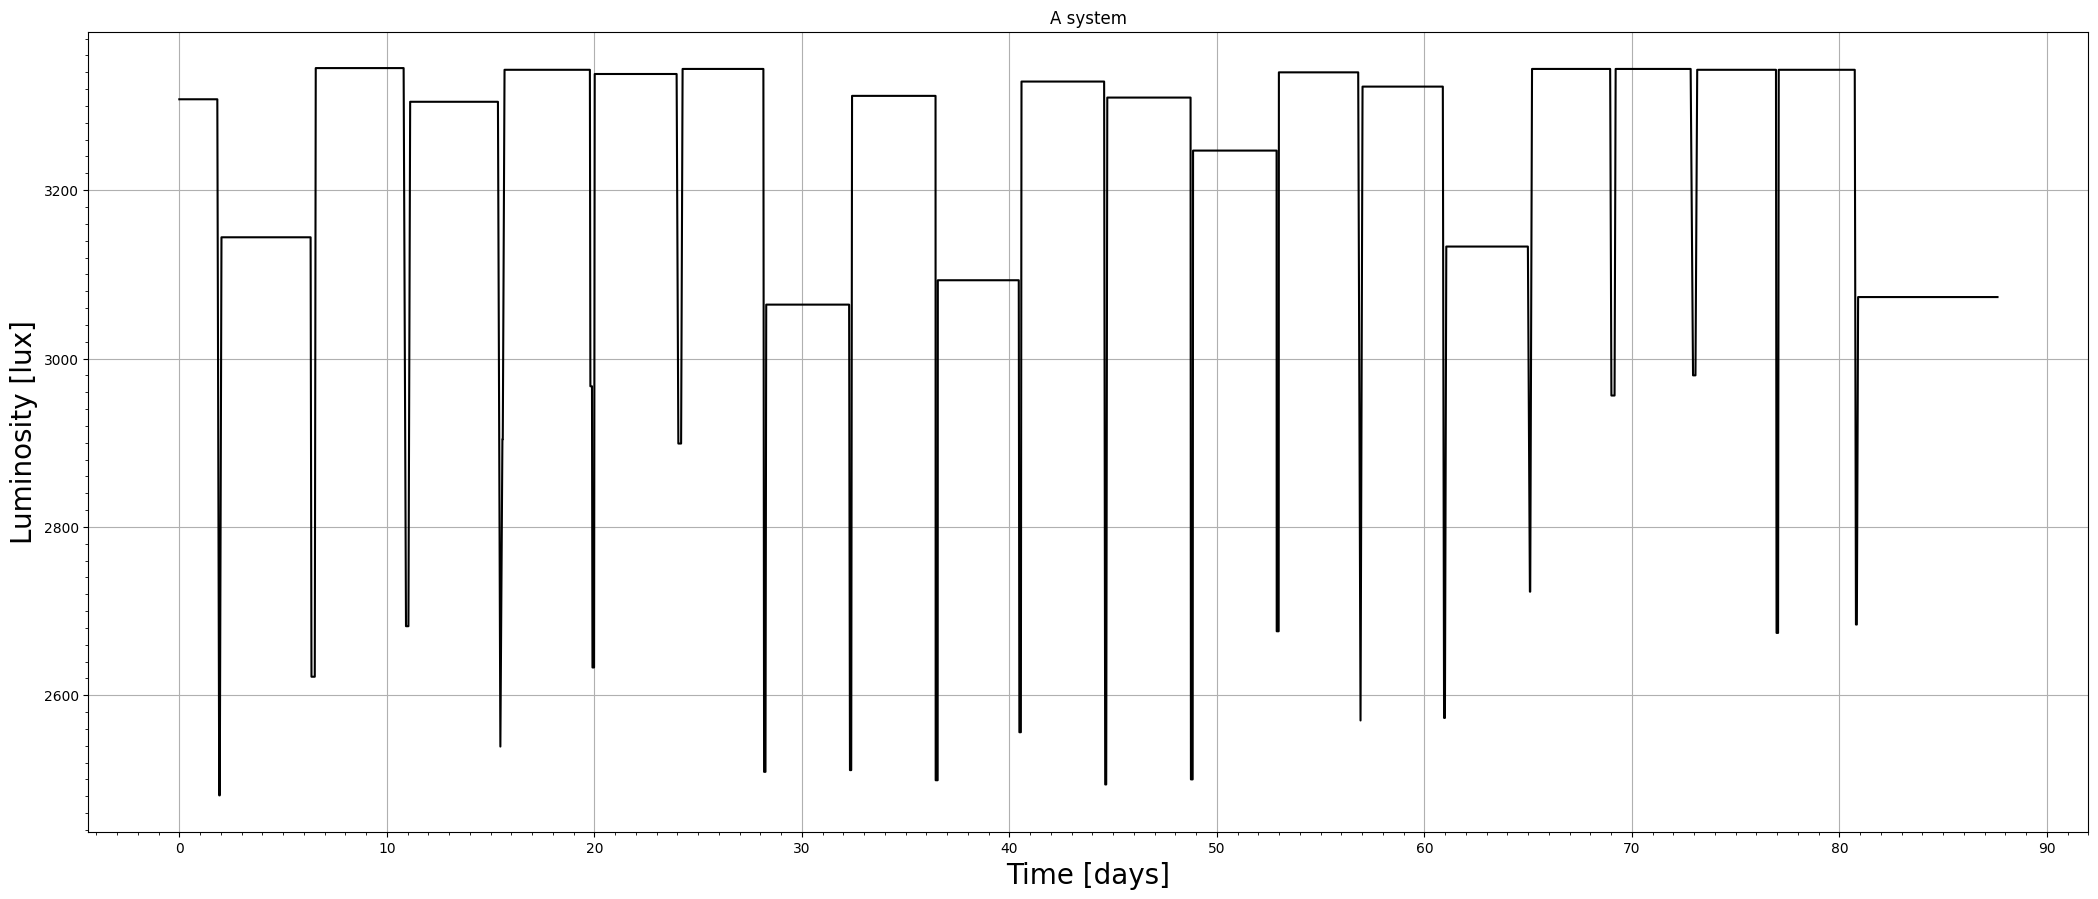

In [41]:
figure = plt.figure(figsize=(20,8))
bx = figure.add_axes([0,0,1,1])

bx.plot(LCP1['relative_time']/1000, LCP1['AmbientLightSensor'], color='black')
bx.set_xlabel('Time [days]', size=20)
bx.set_ylabel('Luminosity [lux]', size=20)
bx.set_title('A system')
bx.yaxis.set_major_locator(MultipleLocator(200))
bx.yaxis.set_minor_locator(MultipleLocator(20))
bx.xaxis.set_major_locator(MultipleLocator(10))
bx.xaxis.set_minor_locator(MultipleLocator(1))
bx.grid()

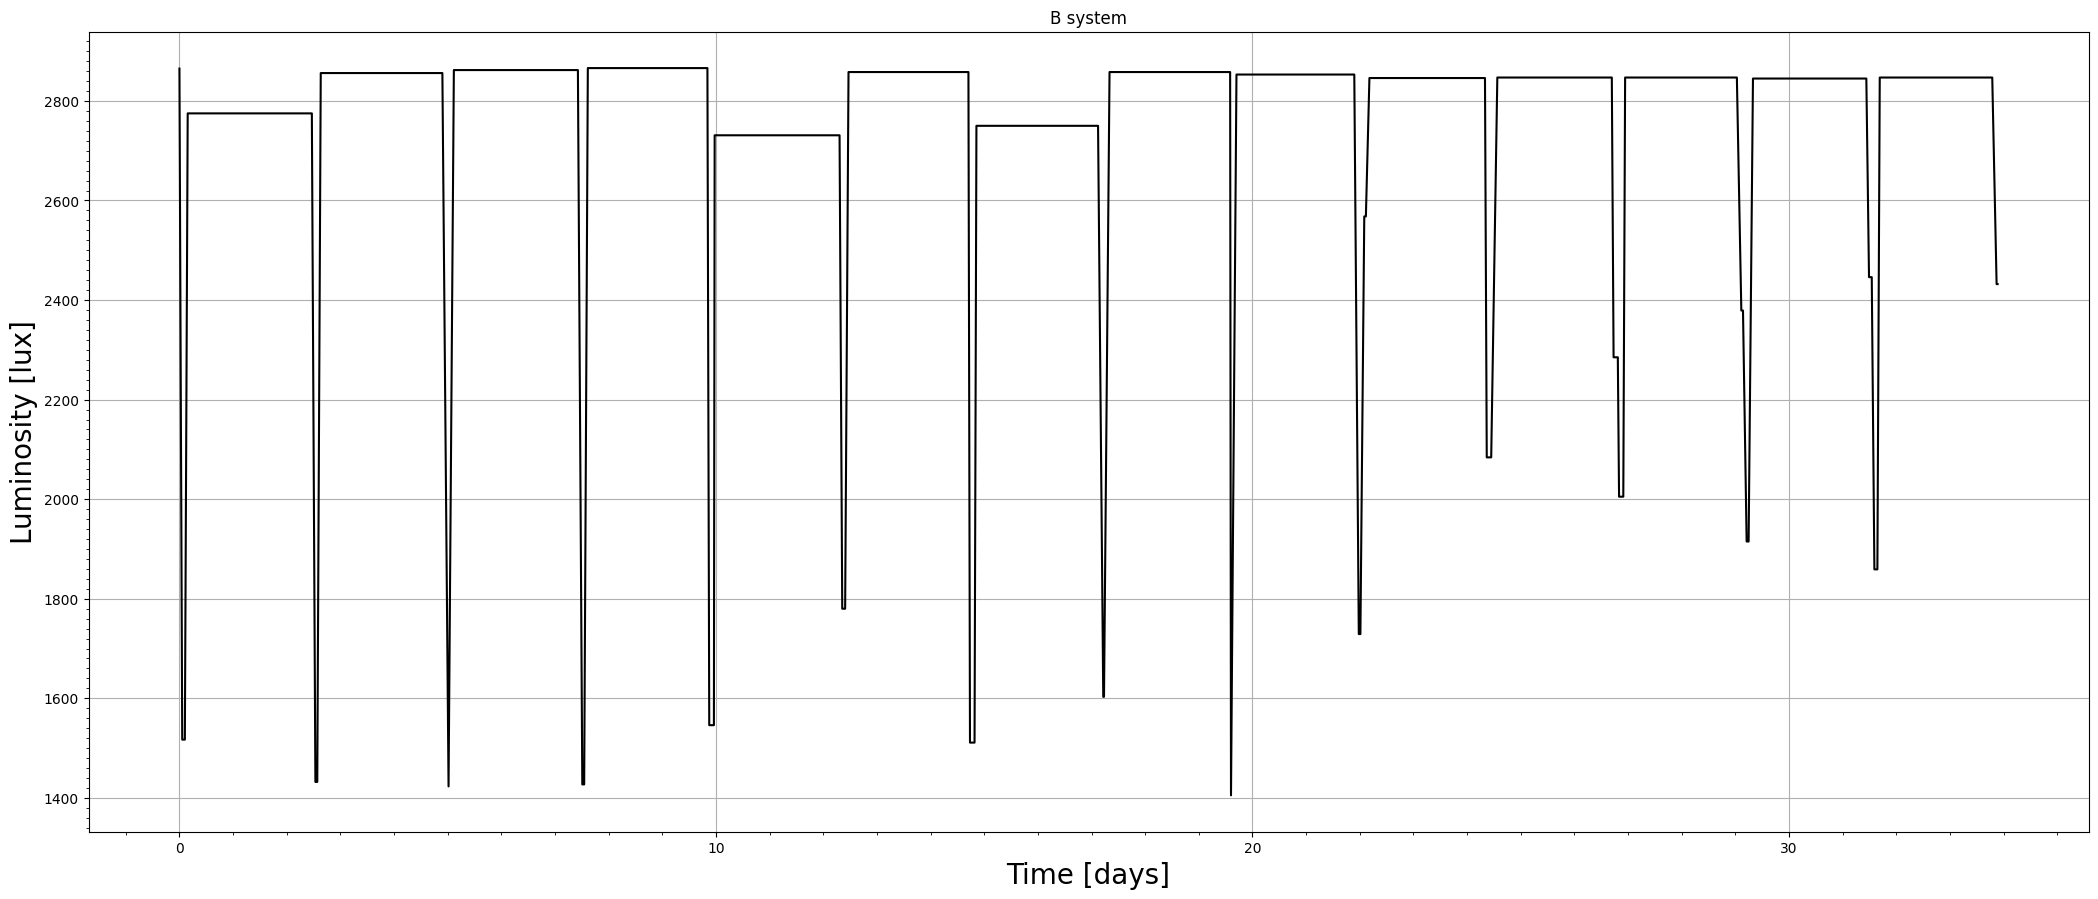

In [42]:
figure = plt.figure(figsize=(20,8))
bx = figure.add_axes([0,0,1,1])

bx.plot(LCP2['relative_time']/1000, LCP2['AmbientLightSensor'], color='black')
bx.set_xlabel('Time [days]', size=20)
bx.set_ylabel('Luminosity [lux]', size=20)
bx.set_title('B system')
bx.yaxis.set_major_locator(MultipleLocator(200))
bx.yaxis.set_minor_locator(MultipleLocator(20))
bx.xaxis.set_major_locator(MultipleLocator(10))
bx.xaxis.set_minor_locator(MultipleLocator(1))
bx.grid()

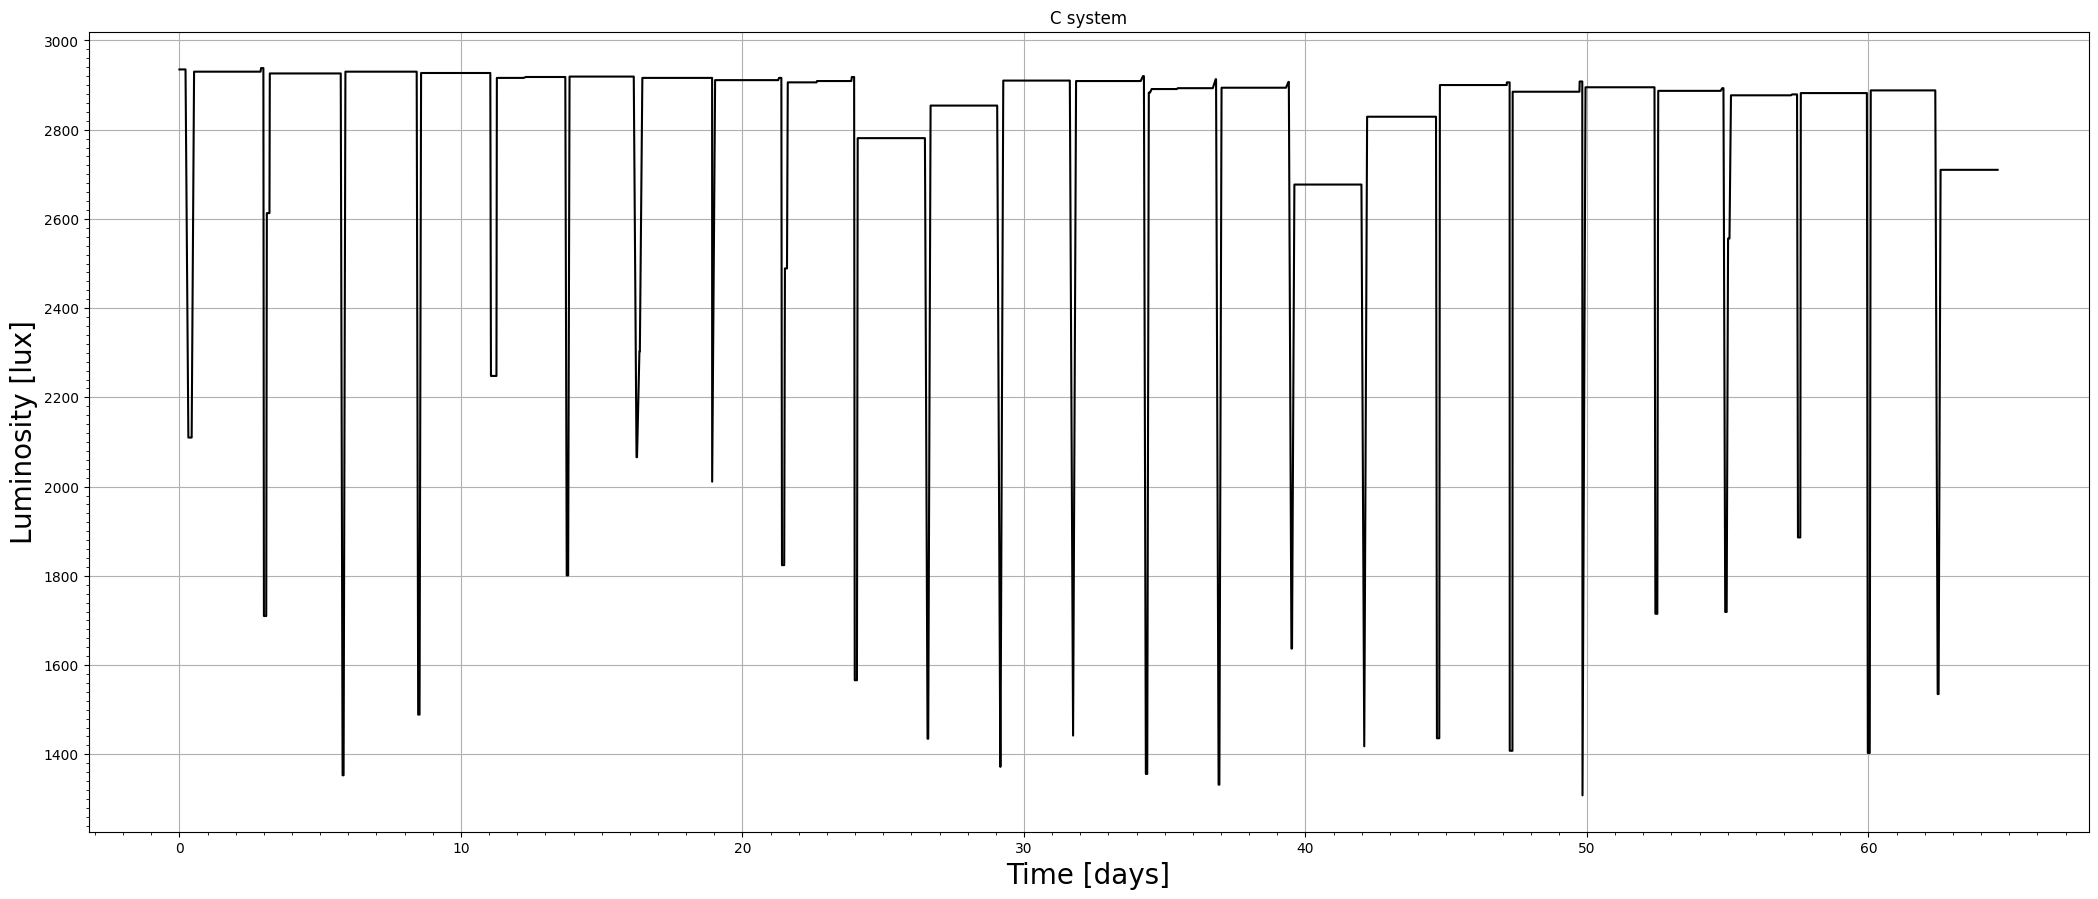

In [43]:
figure = plt.figure(figsize=(20,8))
bx = figure.add_axes([0,0,1,1])

bx.plot(LCP3['relative_time']/1000, LCP3['AmbientLightSensor'], color='black')
bx.set_xlabel('Time [days]', size=20)
bx.set_ylabel('Luminosity [lux]', size=20)
bx.set_title('C system')
bx.yaxis.set_major_locator(MultipleLocator(200))
bx.yaxis.set_minor_locator(MultipleLocator(20))
bx.xaxis.set_major_locator(MultipleLocator(10))
bx.xaxis.set_minor_locator(MultipleLocator(1))
bx.grid()

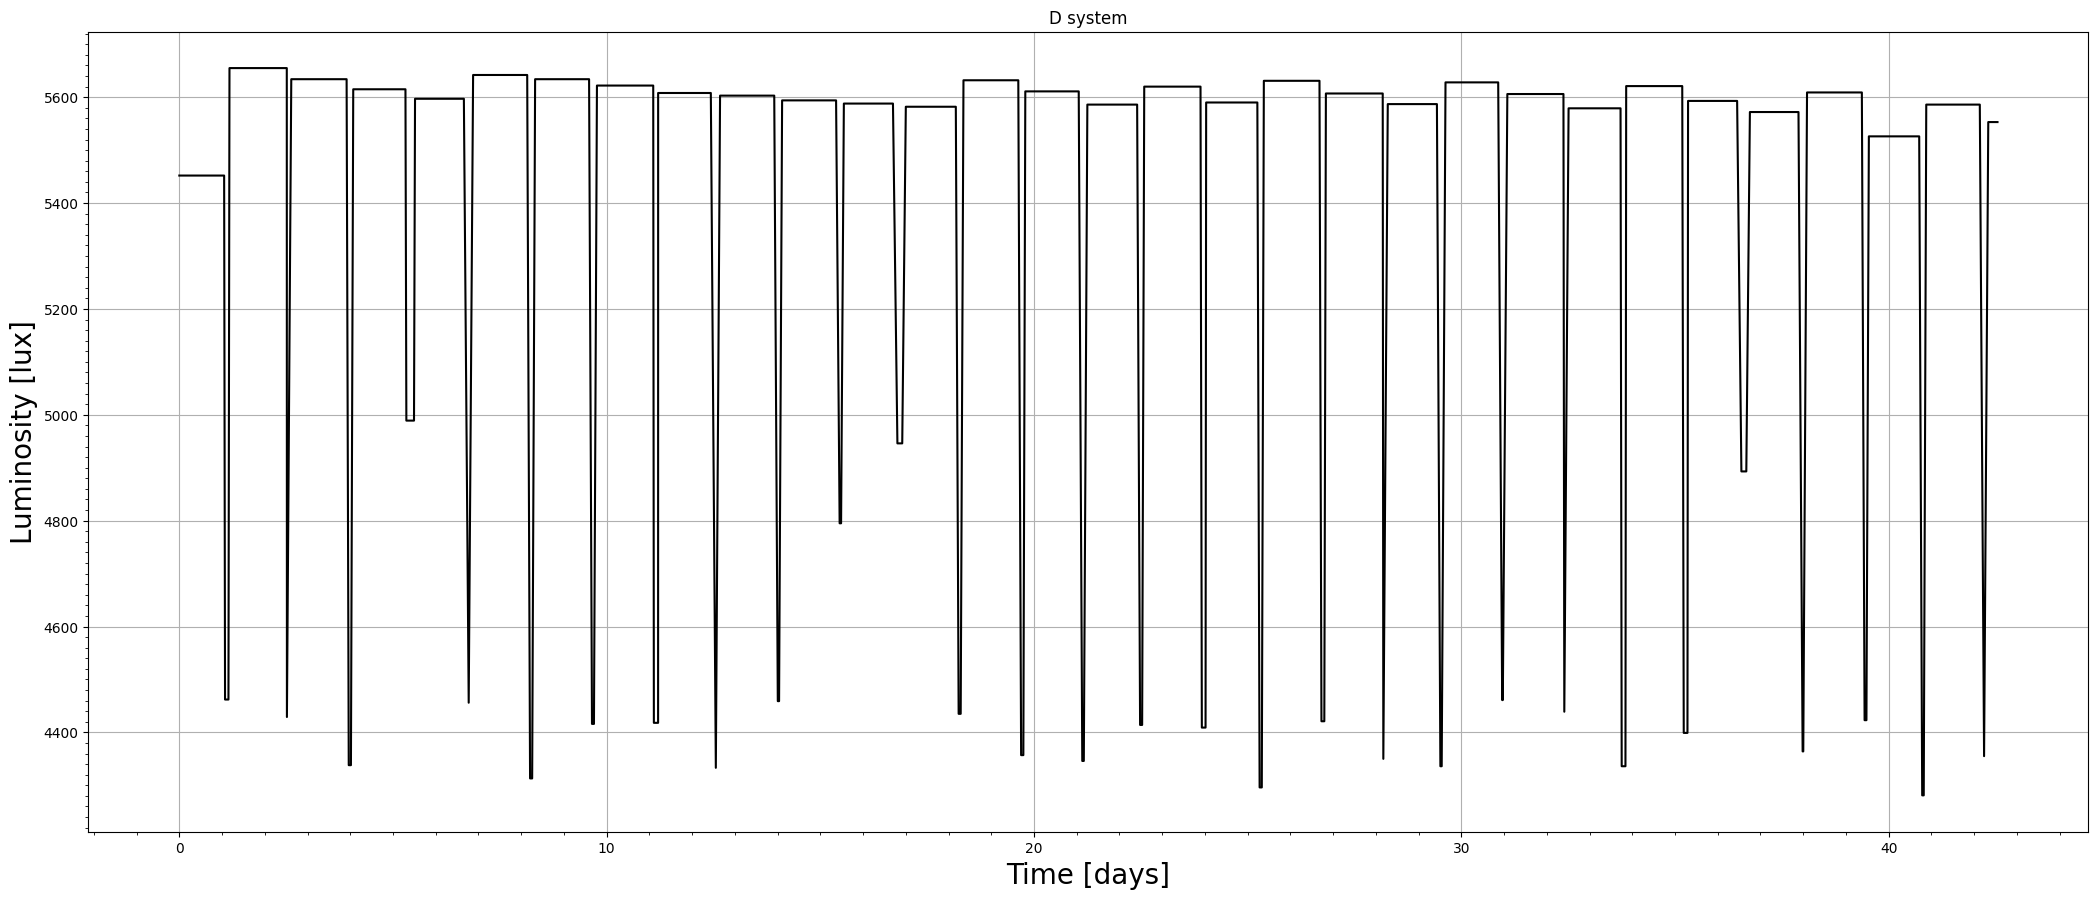

In [44]:
figure = plt.figure(figsize=(20,8))
bx = figure.add_axes([0,0,1,1])

bx.plot(LCP4['relative_time']/1000, LCP4['AmbientLightSensor'], color='black')
bx.set_xlabel('Time [days]', size=20)
bx.set_ylabel('Luminosity [lux]', size=20)
bx.set_title('D system')
bx.yaxis.set_major_locator(MultipleLocator(200))
bx.yaxis.set_minor_locator(MultipleLocator(20))
bx.xaxis.set_major_locator(MultipleLocator(10))
bx.xaxis.set_minor_locator(MultipleLocator(1))
bx.grid()

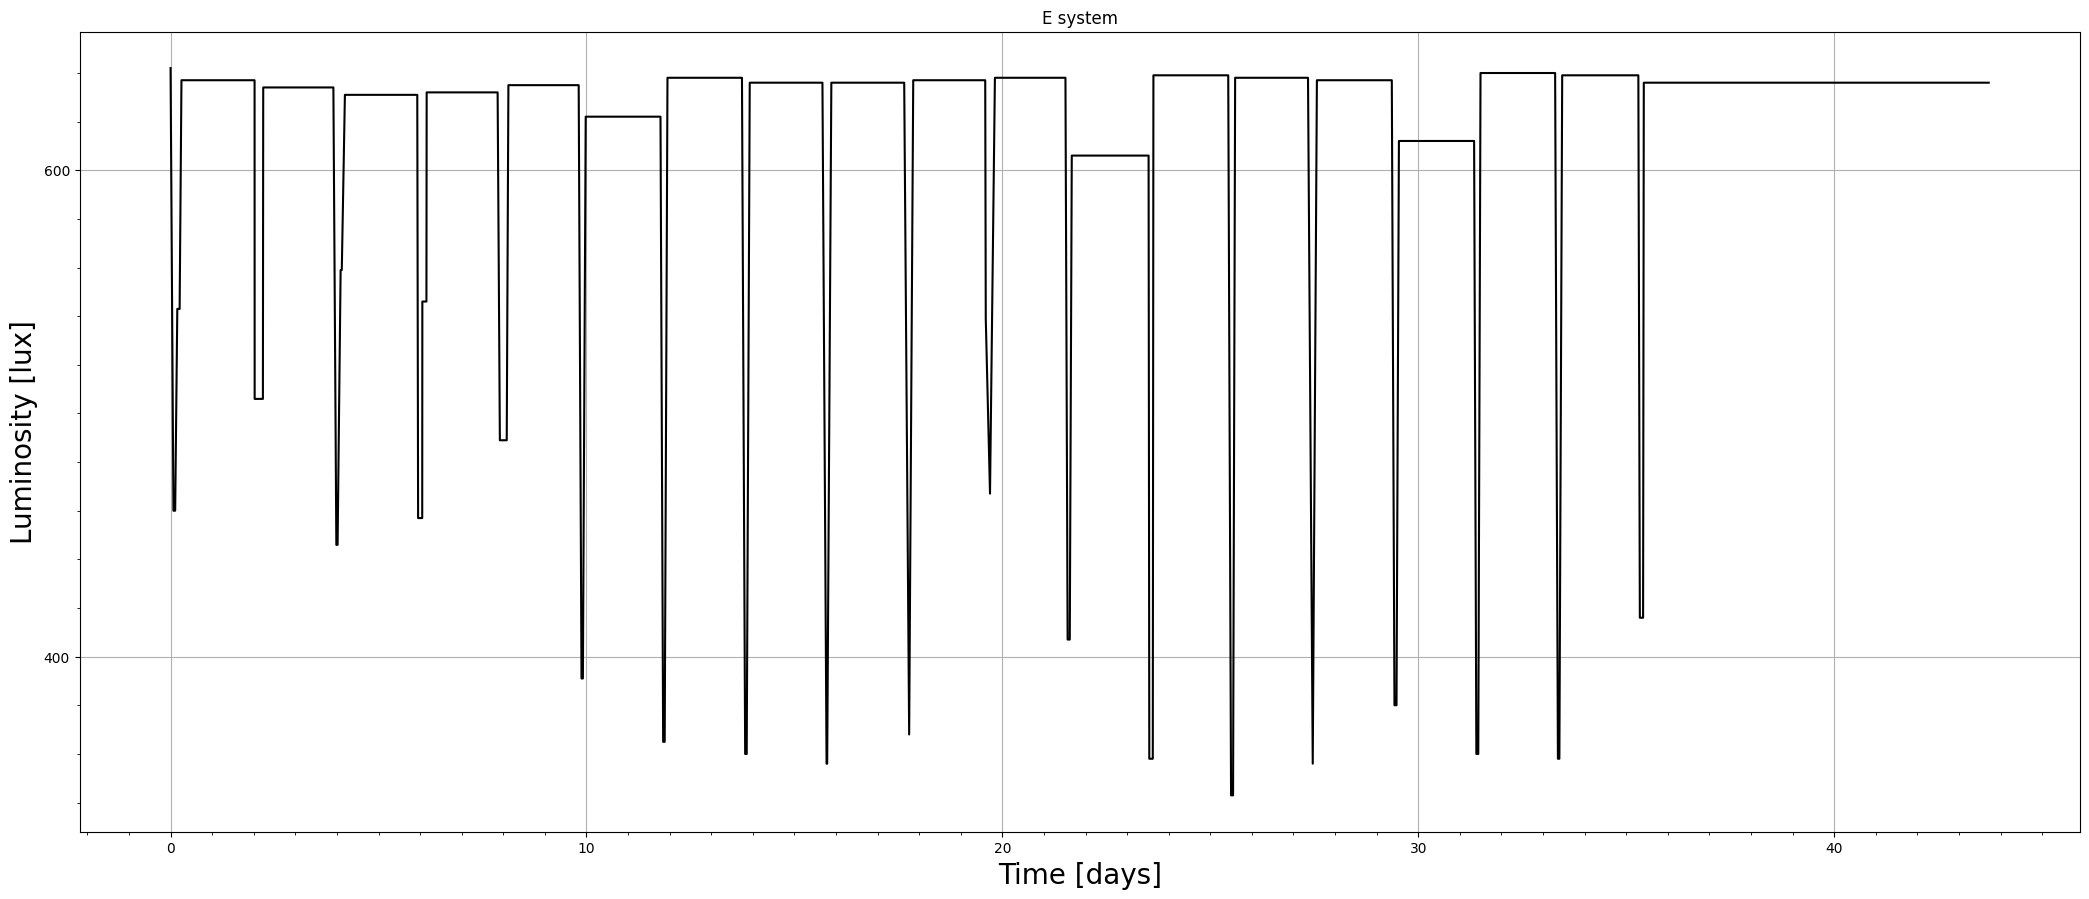

In [45]:
figure = plt.figure(figsize=(20,8))
bx = figure.add_axes([0,0,1,1])

bx.plot(LCP5['relative_time']/1000, LCP5['AmbientLightSensor'], color='black')
bx.set_xlabel('Time [days]', size=20)
bx.set_ylabel('Luminosity [lux]', size=20)
bx.set_title('E system')
bx.yaxis.set_major_locator(MultipleLocator(200))
bx.yaxis.set_minor_locator(MultipleLocator(20))
bx.xaxis.set_major_locator(MultipleLocator(10))
bx.xaxis.set_minor_locator(MultipleLocator(1))
bx.grid()

In [46]:
LC1 = pd.read_csv('LCE/LC2/lc1.csv')
LC2 = pd.read_csv('LCE/LC2/lc2.csv')
LC3 = pd.read_csv('LCE/LC2/lc3.csv')
LC4 = pd.read_csv('LCE/LC2/lc4.csv')#
LC5 = pd.read_csv('LCE/LC2/lc5.csv')
LC6 = pd.read_csv('LCE/LC2/lc6.csv')
LC7 = pd.read_csv('LCE/LC2/lc7.csv')
LC8 = pd.read_csv('LCE/LC2/lc8.csv')
#LC9 = pd.read_csv('LC9.csv')
#LC10 = pd.read_csv('LC10.csv')

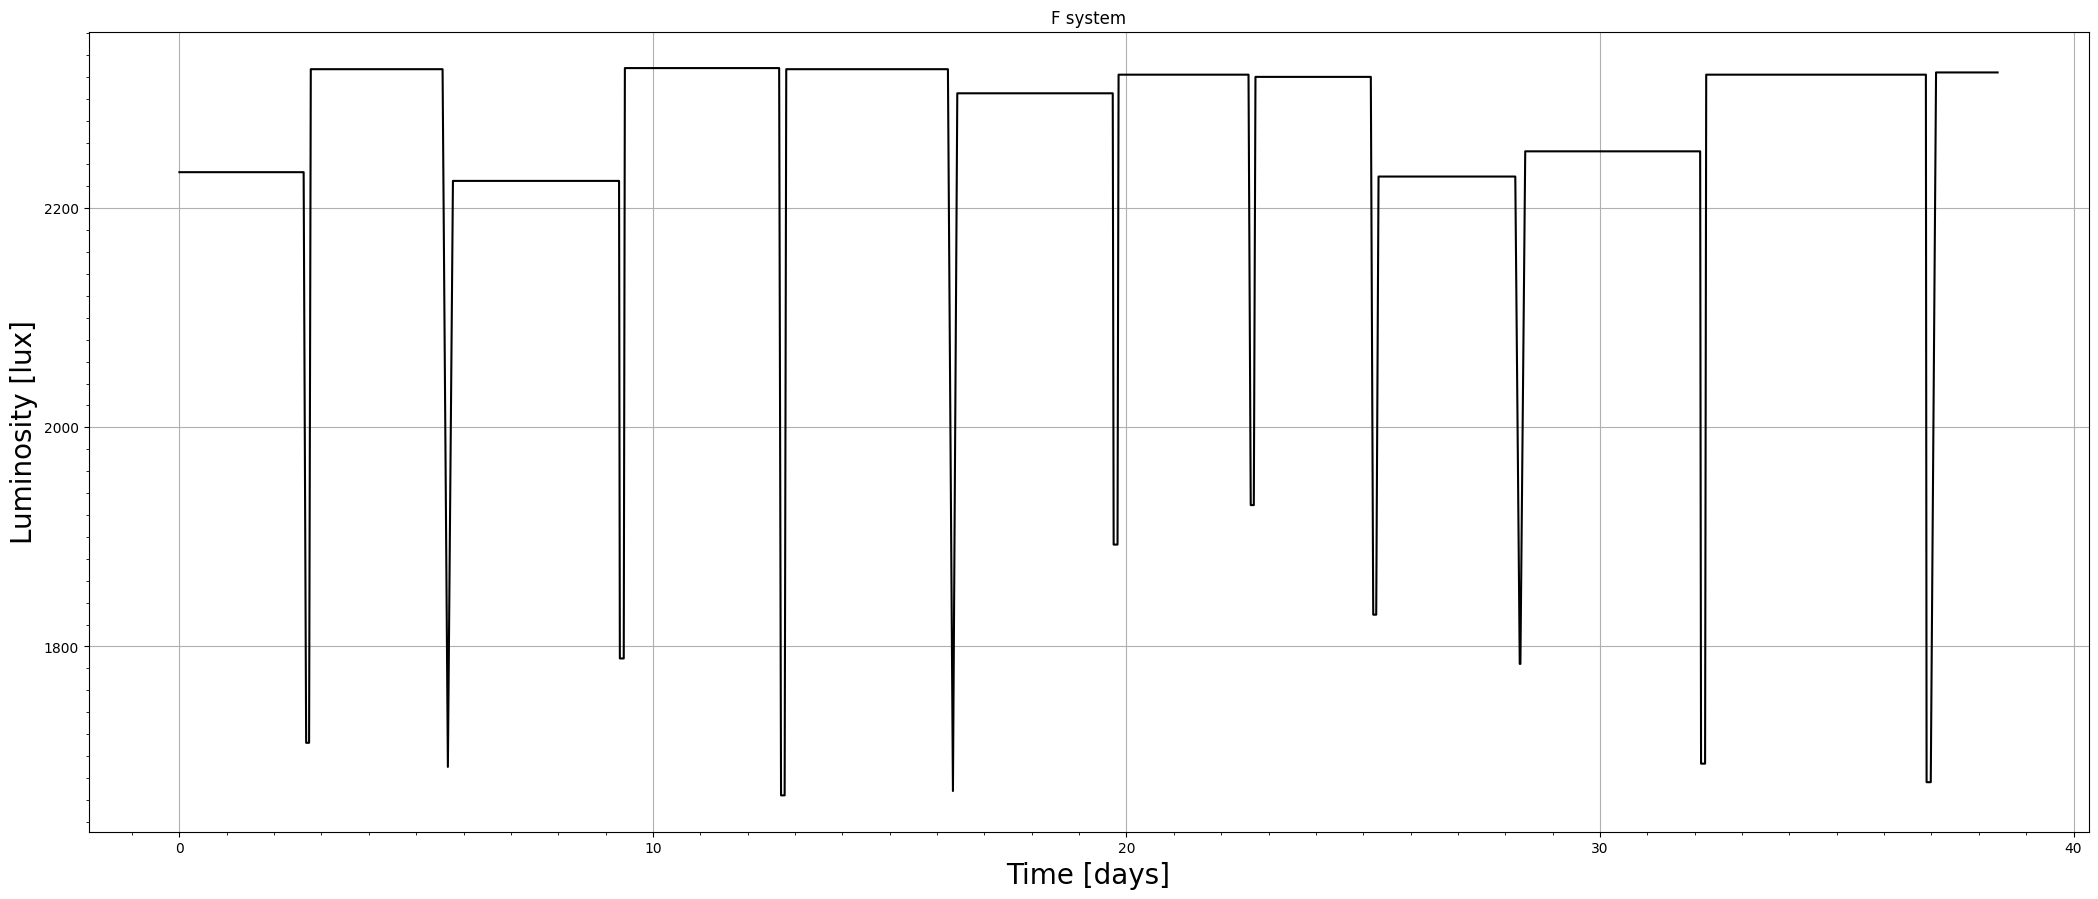

In [47]:
figure = plt.figure(figsize=(20,8))
bx = figure.add_axes([0,0,1,1])

bx.plot(LC1['relative_time']/1000, LC1['AmbientLightSensor'], color='black')
bx.set_xlabel('Time [days]', size=20)
bx.set_ylabel('Luminosity [lux]', size=20)
bx.set_title('F system')
bx.yaxis.set_major_locator(MultipleLocator(200))
bx.yaxis.set_minor_locator(MultipleLocator(20))
bx.xaxis.set_major_locator(MultipleLocator(10))
bx.xaxis.set_minor_locator(MultipleLocator(1))
bx.grid()

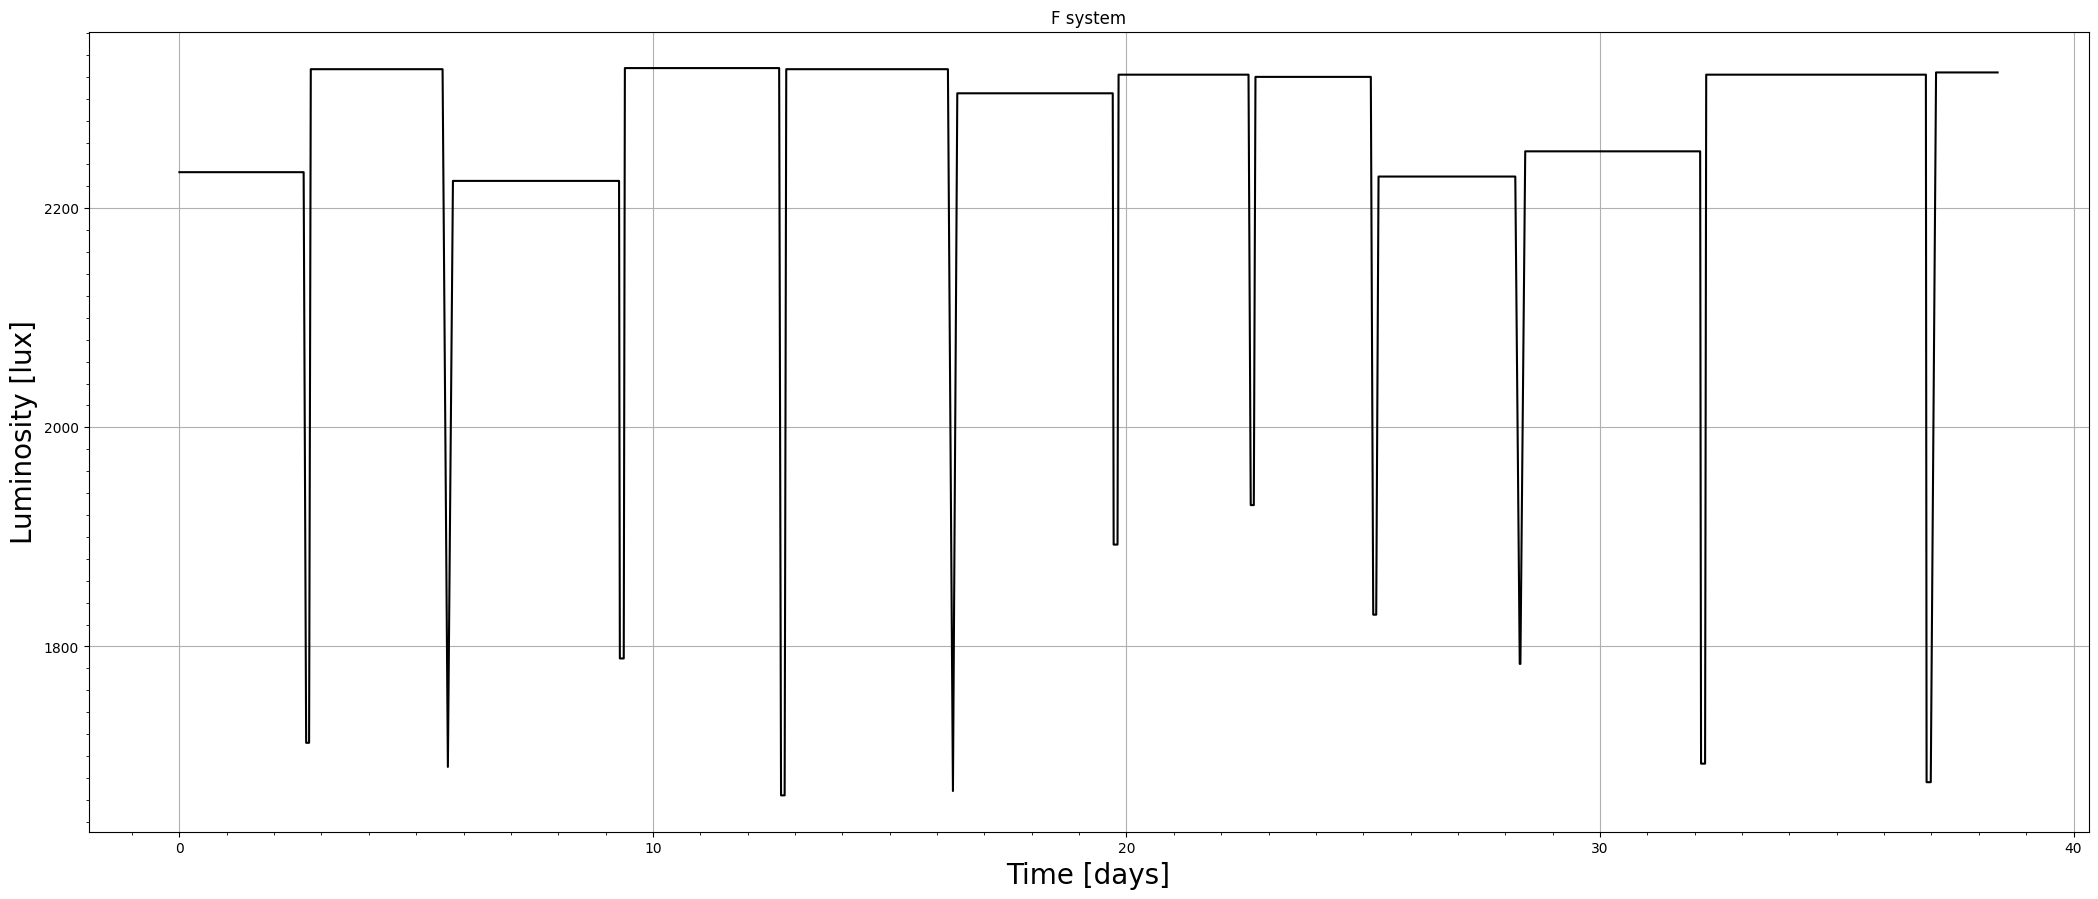

In [48]:
figure = plt.figure(figsize=(20,8))
bx = figure.add_axes([0,0,1,1])

bx.plot(LC1['relative_time']/1000, LC1['AmbientLightSensor'], color='black')
bx.set_xlabel('Time [days]', size=20)
bx.set_ylabel('Luminosity [lux]', size=20)
bx.set_title('F system')
bx.yaxis.set_major_locator(MultipleLocator(200))
bx.yaxis.set_minor_locator(MultipleLocator(20))
bx.xaxis.set_major_locator(MultipleLocator(10))
bx.xaxis.set_minor_locator(MultipleLocator(1))
bx.grid()

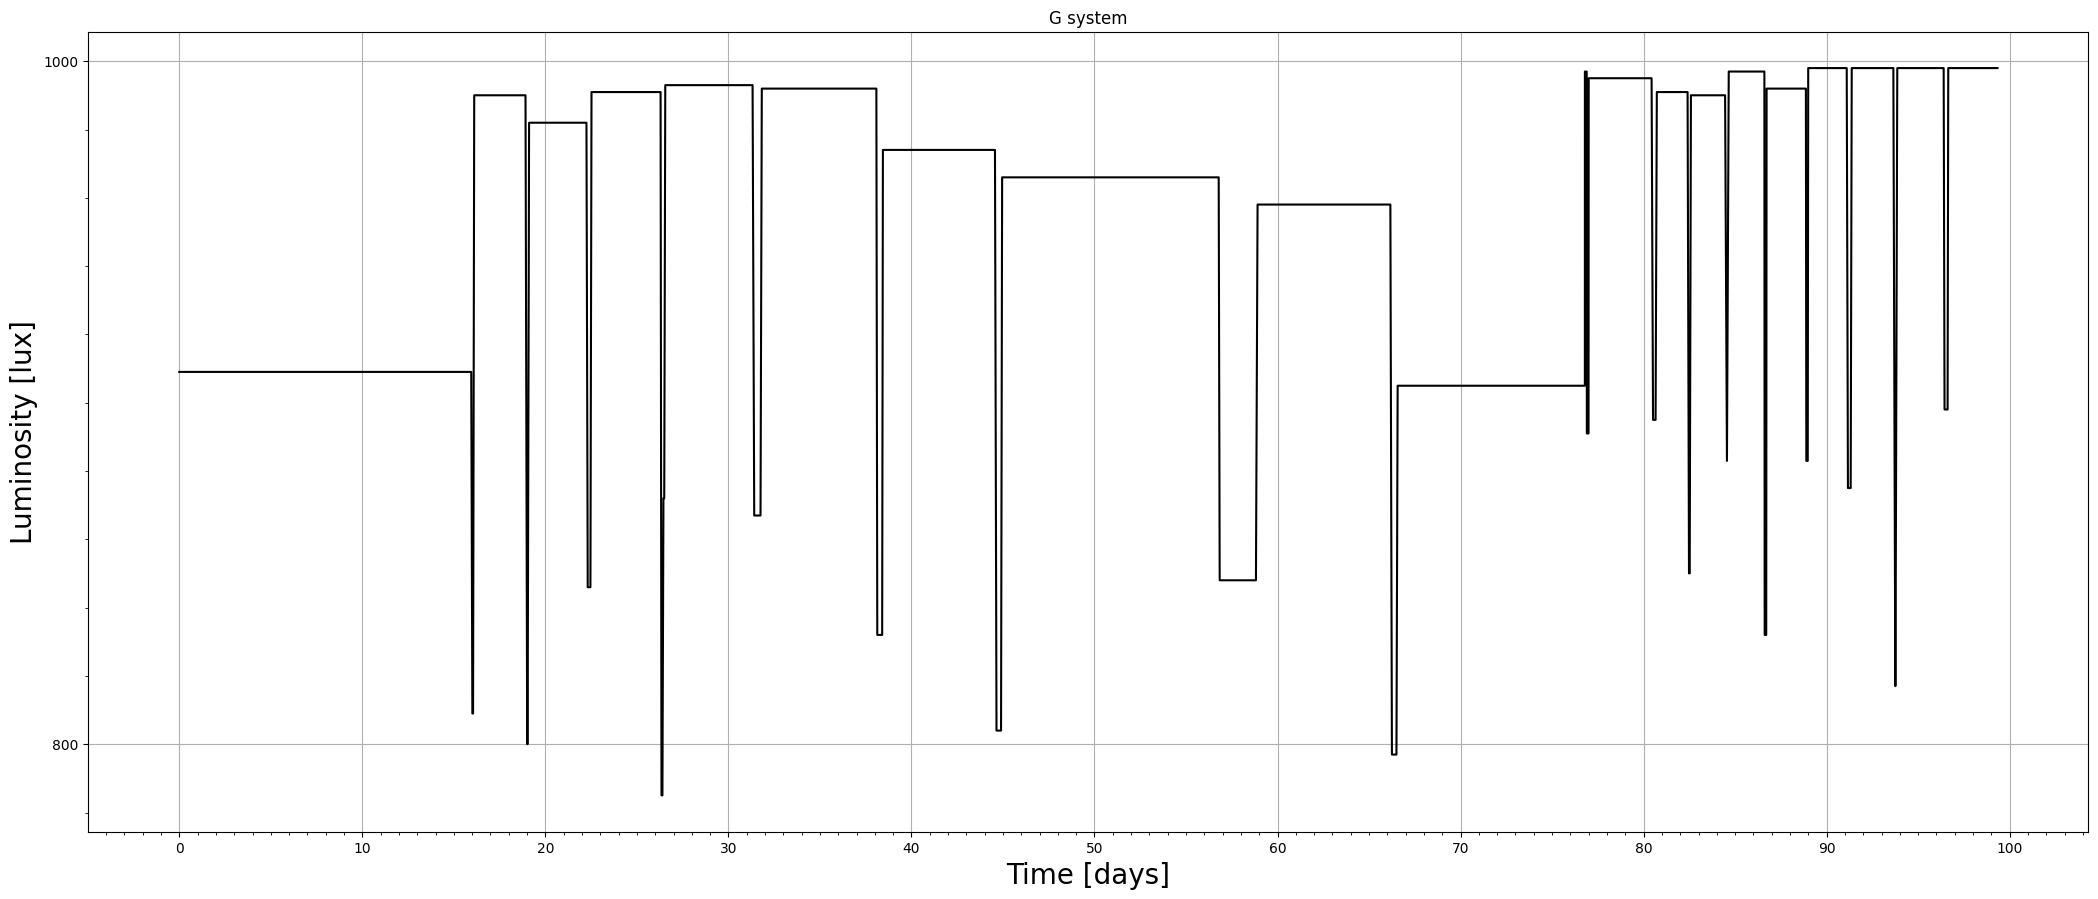

In [49]:
figure = plt.figure(figsize=(20,8))
bx = figure.add_axes([0,0,1,1])

bx.plot(LC2['relative_time']/1000, LC2['AmbientLightSensor'], color='black')
bx.set_xlabel('Time [days]', size=20)
bx.set_ylabel('Luminosity [lux]', size=20)
bx.set_title('G system')
bx.yaxis.set_major_locator(MultipleLocator(200))
bx.yaxis.set_minor_locator(MultipleLocator(20))
bx.xaxis.set_major_locator(MultipleLocator(10))
bx.xaxis.set_minor_locator(MultipleLocator(1))
bx.grid()

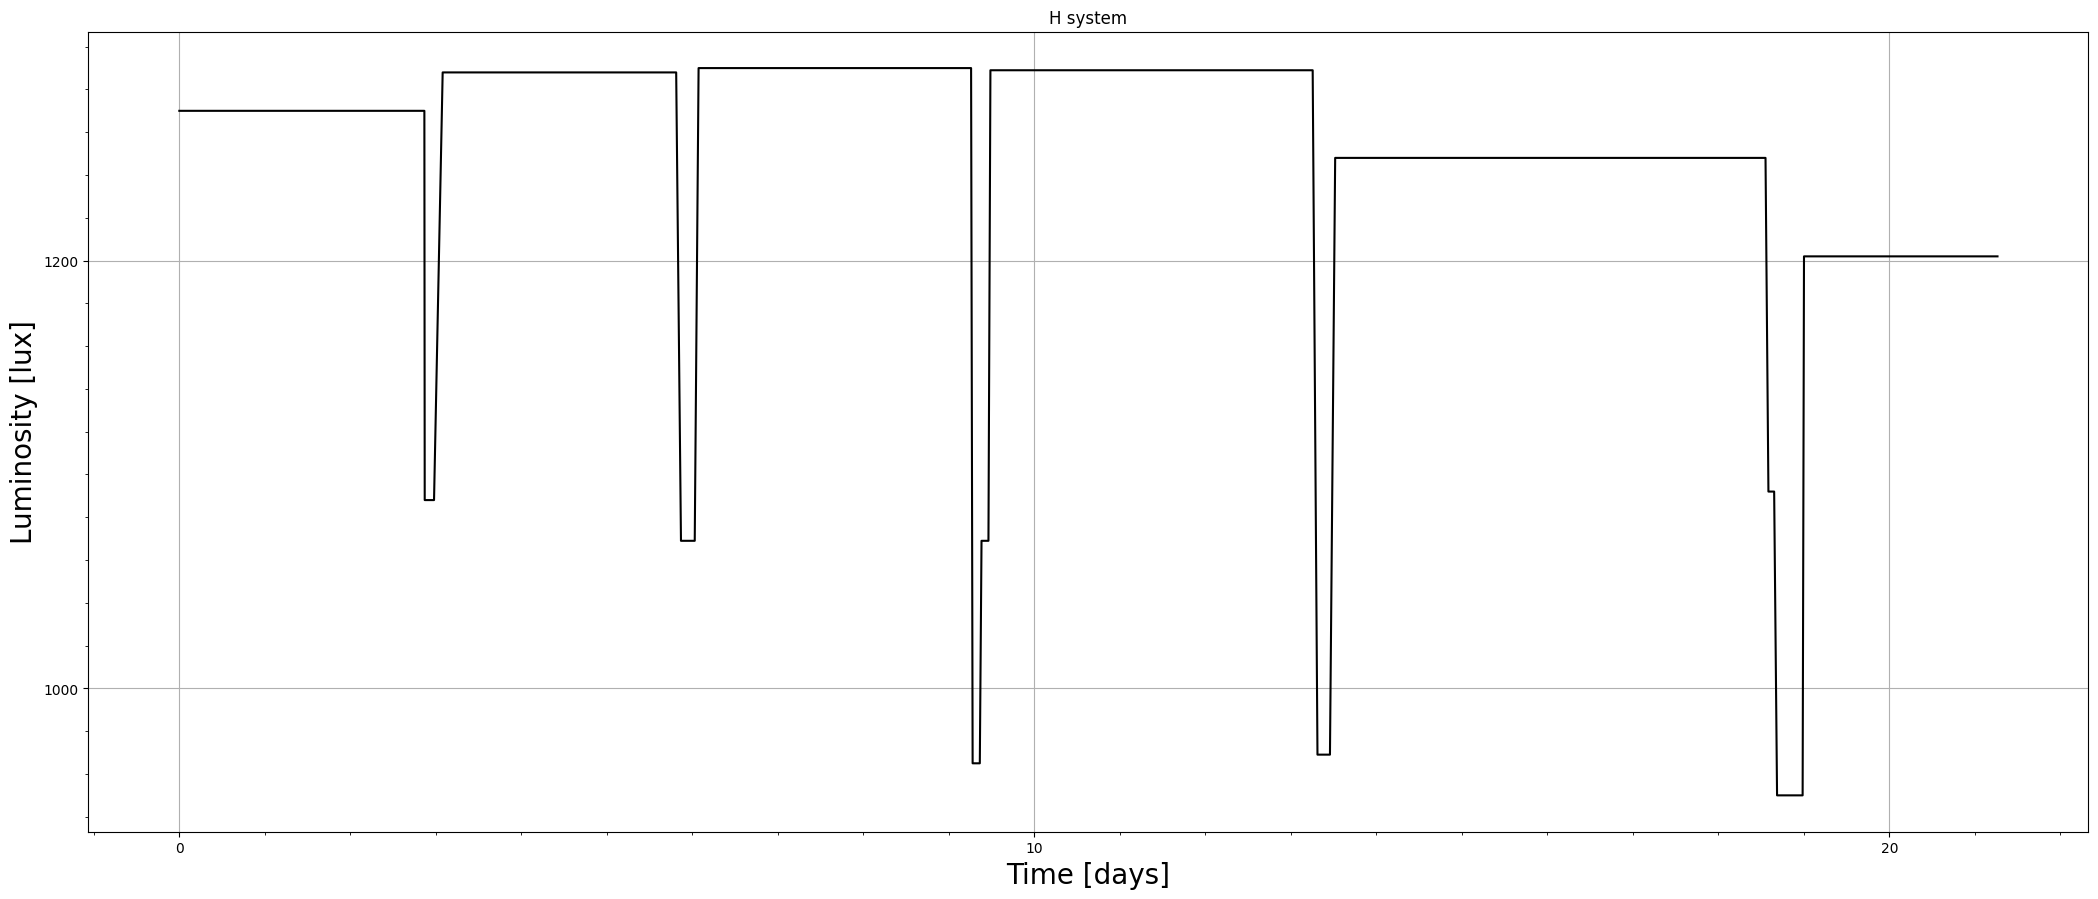

In [50]:
figure = plt.figure(figsize=(20,8))
bx = figure.add_axes([0,0,1,1])

bx.plot(LC3['relative_time']/1000, LC3['AmbientLightSensor'], color='black')
bx.set_xlabel('Time [days]', size=20)
bx.set_ylabel('Luminosity [lux]', size=20)
bx.set_title('H system')
bx.yaxis.set_major_locator(MultipleLocator(200))
bx.yaxis.set_minor_locator(MultipleLocator(20))
bx.xaxis.set_major_locator(MultipleLocator(10))
bx.xaxis.set_minor_locator(MultipleLocator(1))
bx.grid()

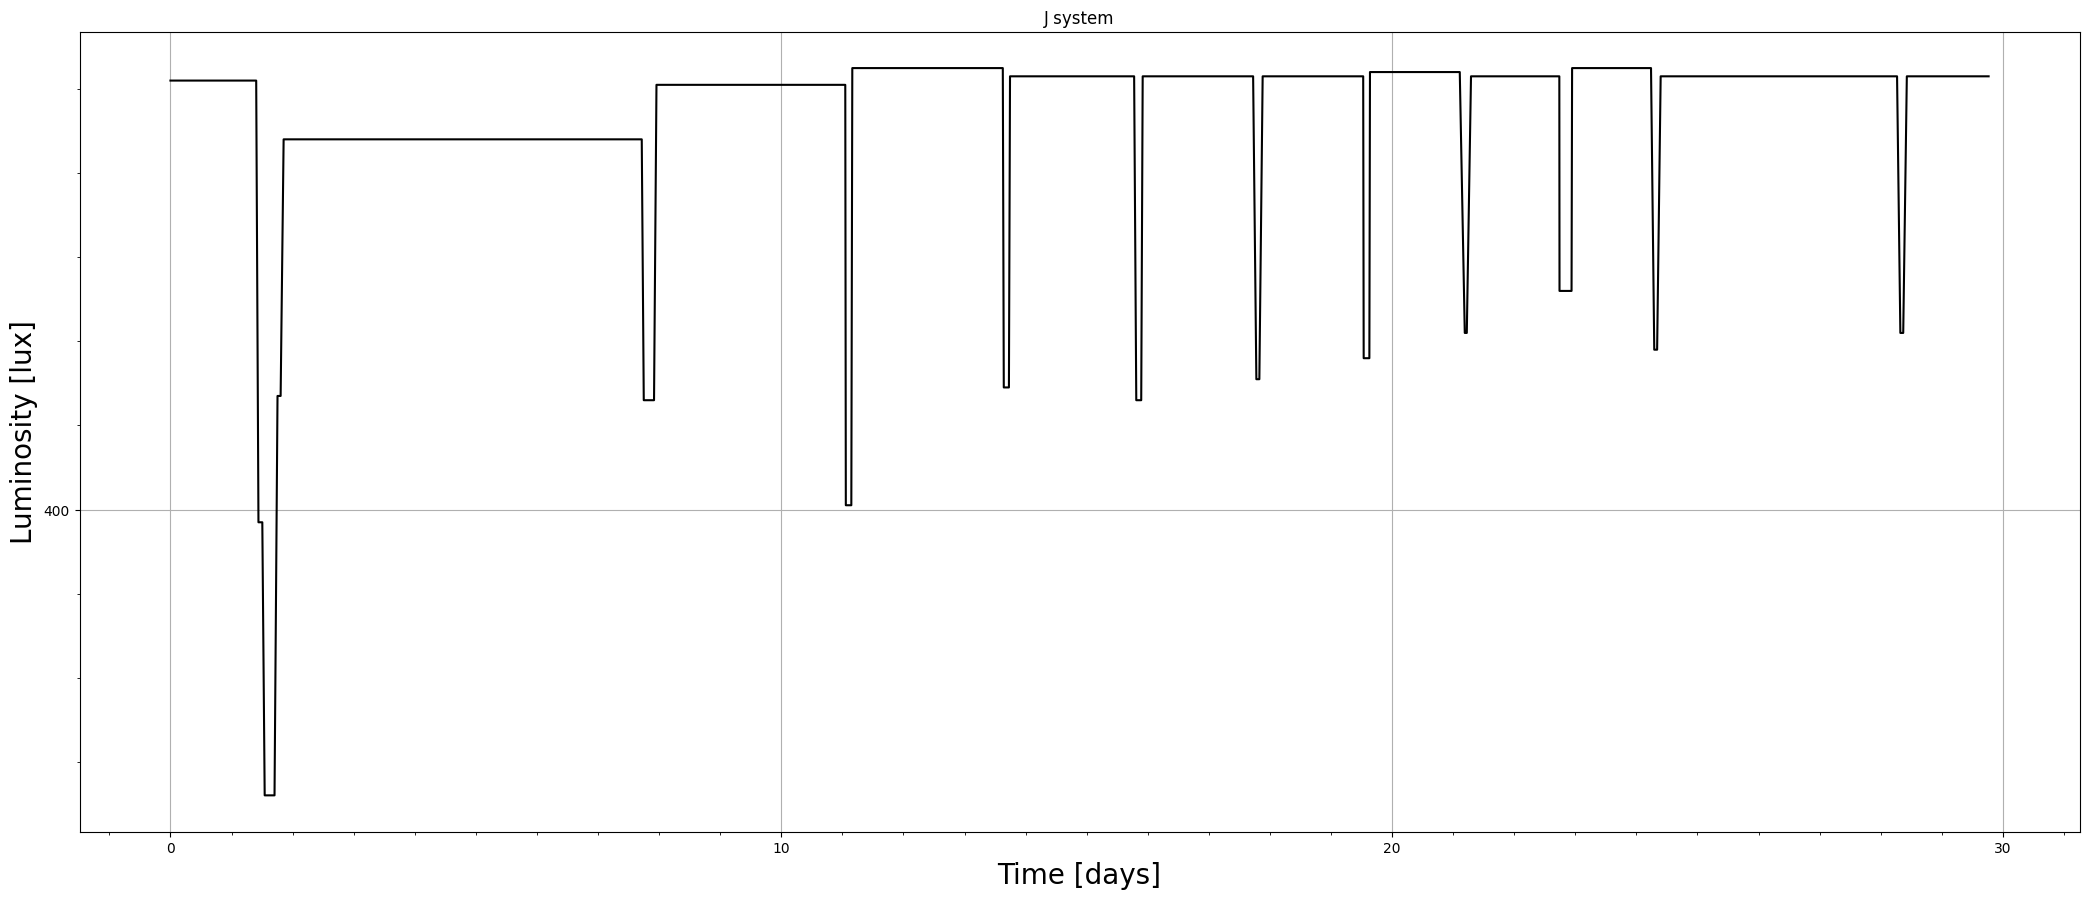

In [51]:
figure = plt.figure(figsize=(20,8))
bx = figure.add_axes([0,0,1,1])

bx.plot(LC5['relative_time']/1000, LC5['AmbientLightSensor'], color='black')
bx.set_xlabel('Time [days]', size=20)
bx.set_ylabel('Luminosity [lux]', size=20)
bx.set_title('J system')
bx.yaxis.set_major_locator(MultipleLocator(200))
bx.yaxis.set_minor_locator(MultipleLocator(20))
bx.xaxis.set_major_locator(MultipleLocator(10))
bx.xaxis.set_minor_locator(MultipleLocator(1))
bx.grid()

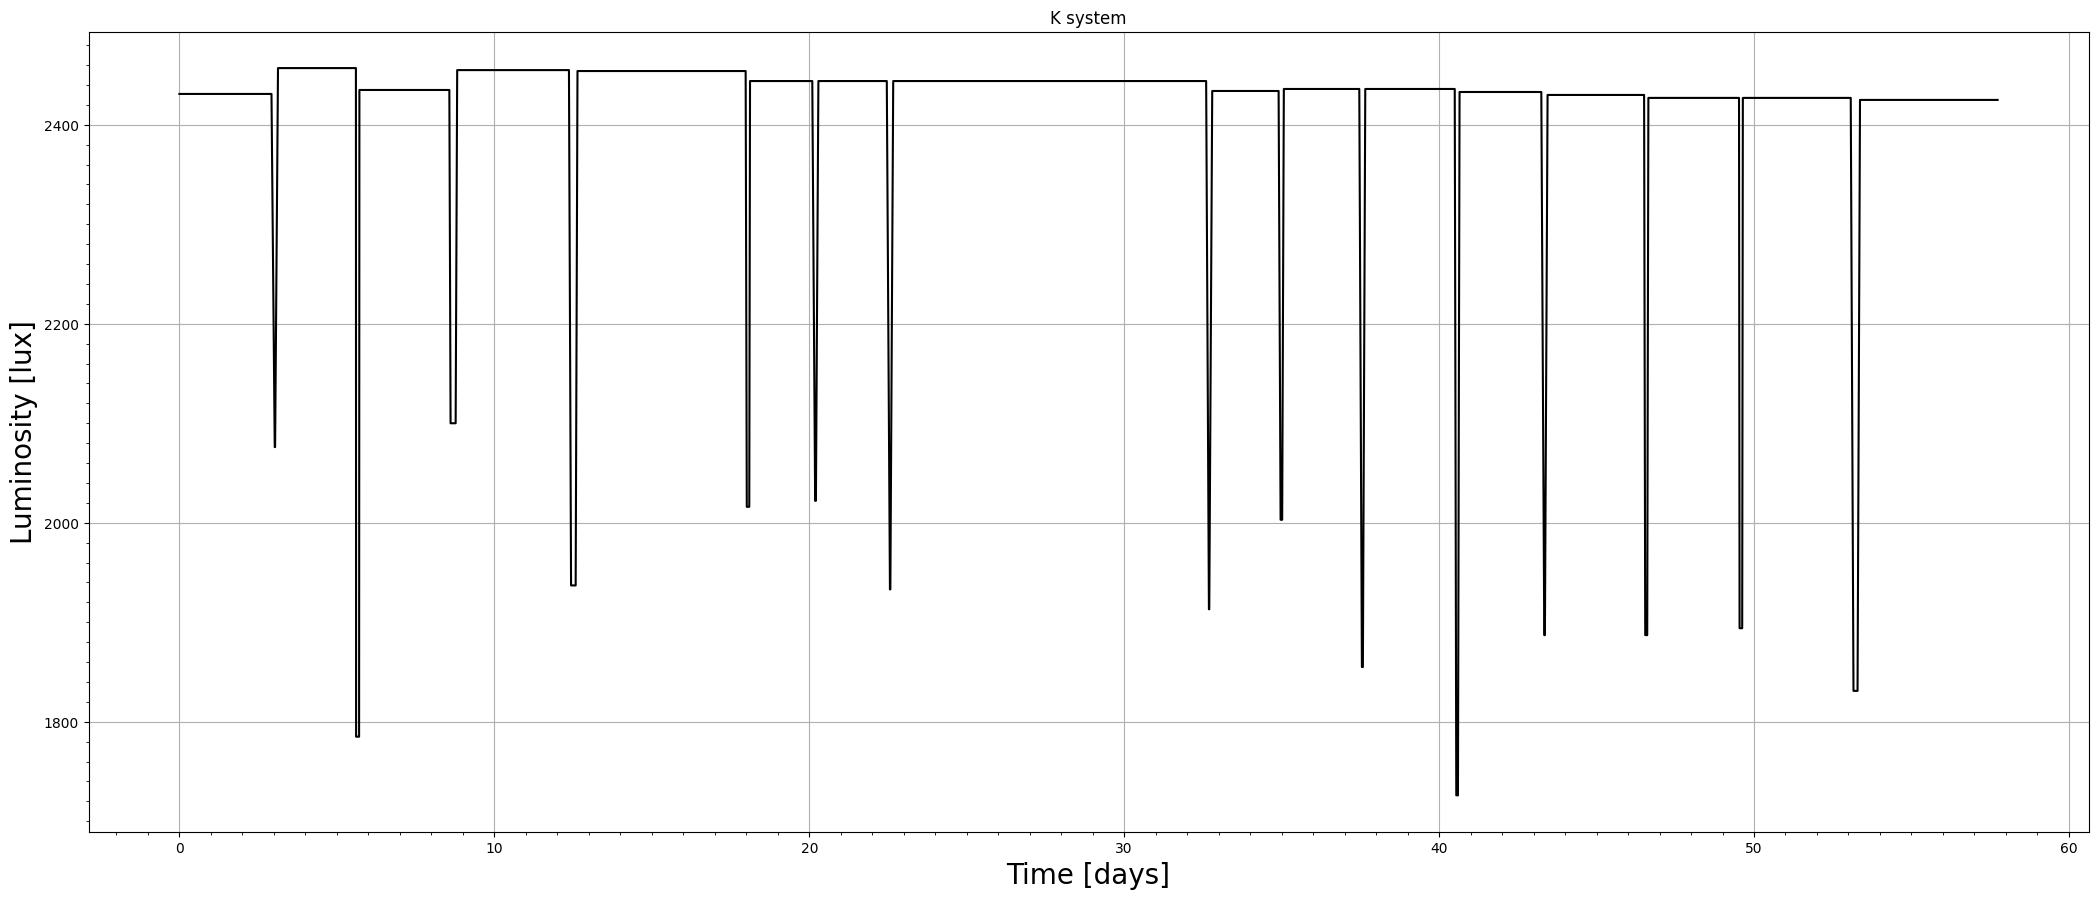

In [52]:
figure = plt.figure(figsize=(20,8))
bx = figure.add_axes([0,0,1,1])

bx.plot(LC6['relative_time']/1000, LC6['AmbientLightSensor'], color='black')
bx.set_xlabel('Time [days]', size=20)
bx.set_ylabel('Luminosity [lux]', size=20)
bx.set_title('K system')
bx.yaxis.set_major_locator(MultipleLocator(200))
bx.yaxis.set_minor_locator(MultipleLocator(20))
bx.xaxis.set_major_locator(MultipleLocator(10))
bx.xaxis.set_minor_locator(MultipleLocator(1))
bx.grid()

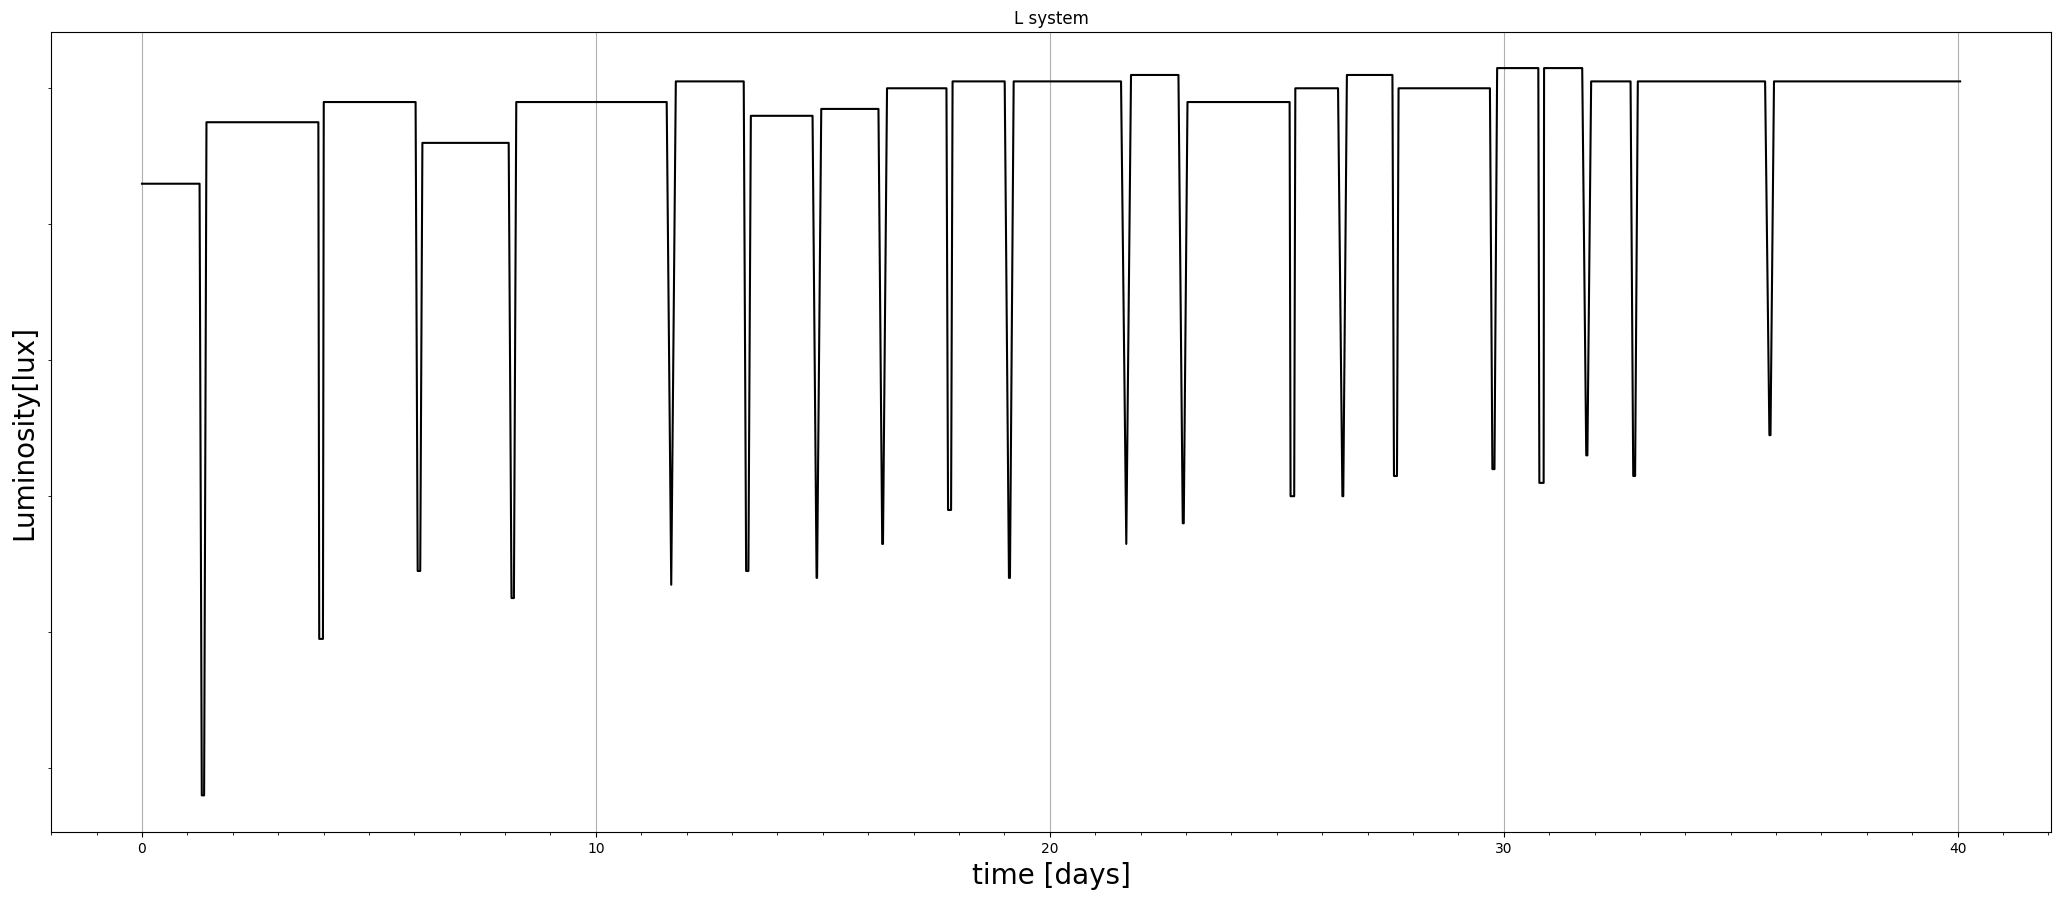

In [53]:
figure = plt.figure(figsize=(20,8))
bx = figure.add_axes([0,0,1,1])

bx.plot(LC7['relative_time']/1000, LC7['AmbientLightSensor'], color='black')
bx.set_xlabel('time [days]', size=20)
bx.set_ylabel('Luminosity[lux]', size=20)
bx.set_title('L system')
bx.yaxis.set_major_locator(MultipleLocator(200))
bx.yaxis.set_minor_locator(MultipleLocator(20))
bx.xaxis.set_major_locator(MultipleLocator(10))
bx.xaxis.set_minor_locator(MultipleLocator(1))
bx.grid()

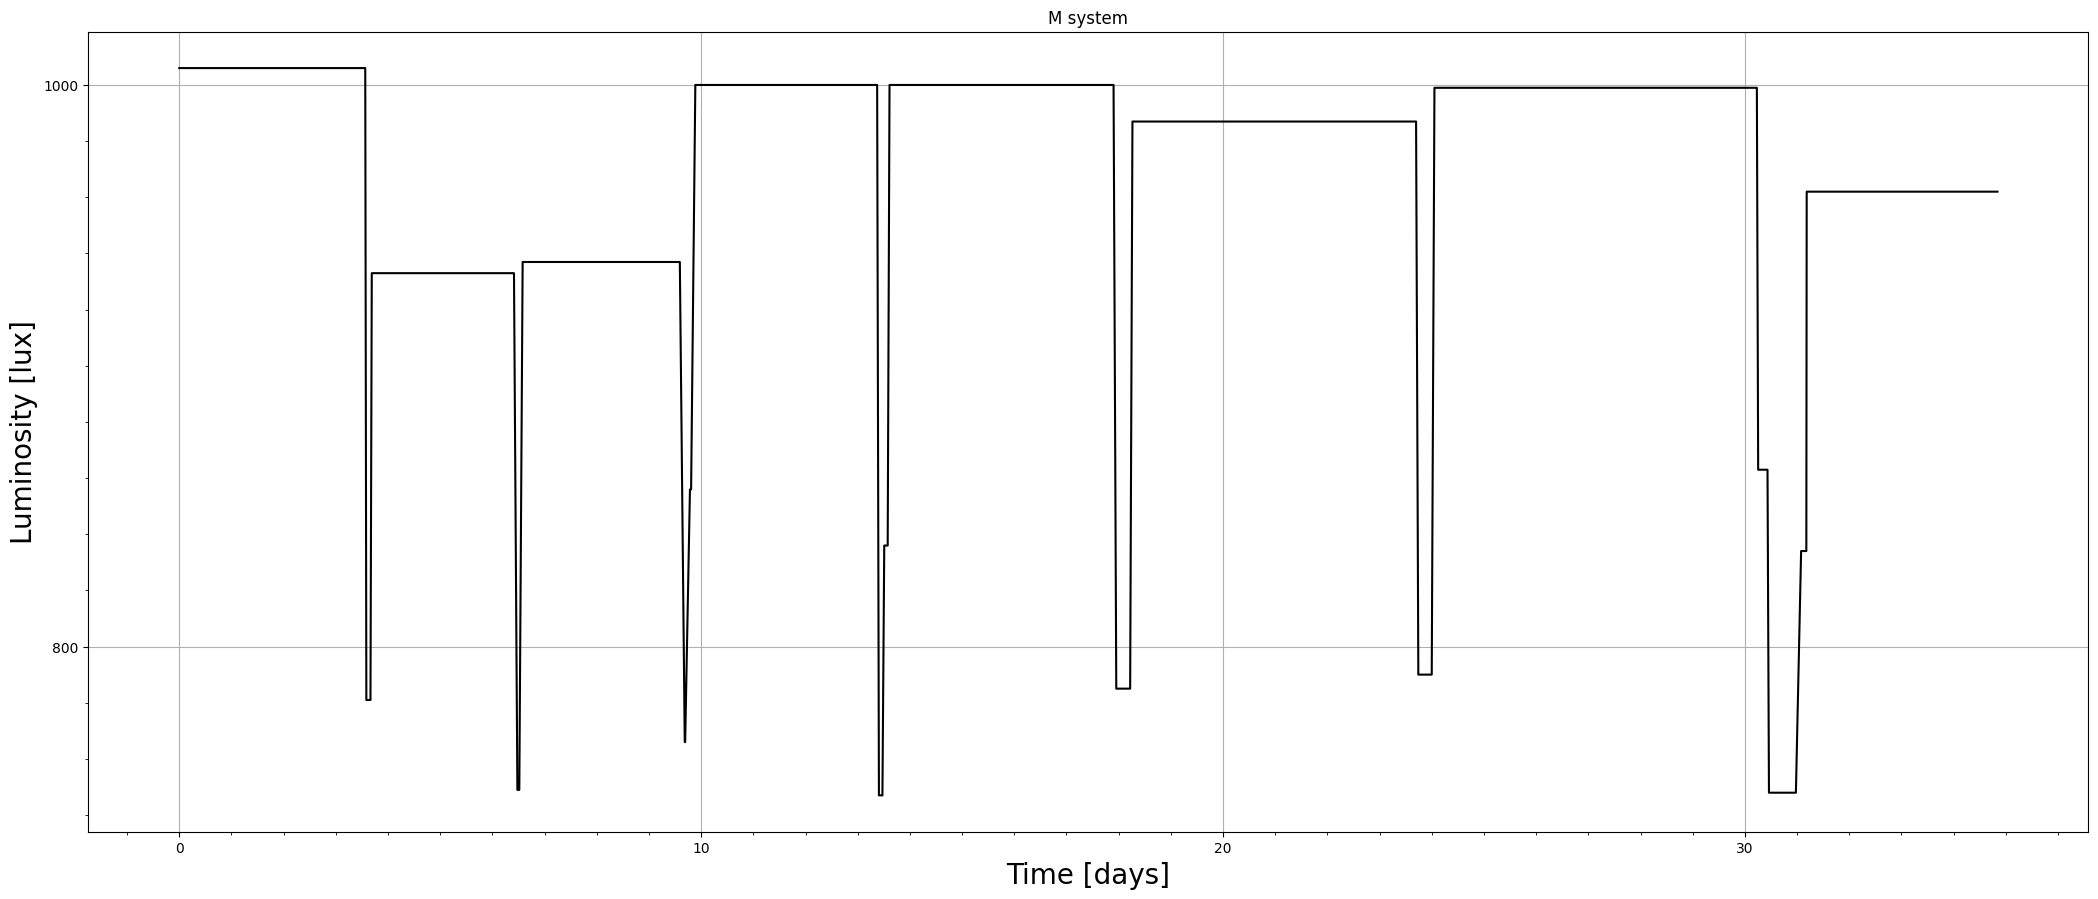

In [54]:
figure = plt.figure(figsize=(20,8))
bx = figure.add_axes([0,0,1,1])

bx.plot(LC8['relative_time']/1000, LC8['AmbientLightSensor'], color='black')
bx.set_xlabel('Time [days]', size=20)
bx.set_ylabel('Luminosity [lux]', size=20)
bx.set_title('M system')
bx.yaxis.set_major_locator(MultipleLocator(200))
bx.yaxis.set_minor_locator(MultipleLocator(20))
bx.xaxis.set_major_locator(MultipleLocator(10))
bx.xaxis.set_minor_locator(MultipleLocator(1))
bx.grid()

## **Simulated light curve function**

Using Artificial intelligence language model (CHAT GPT 4) to find a general mathematical function of a light curve we had this expression:

$ L_c(t)=1-s e^{\frac{{(\phi(t)+0,5)}^2}{0,01}}   $


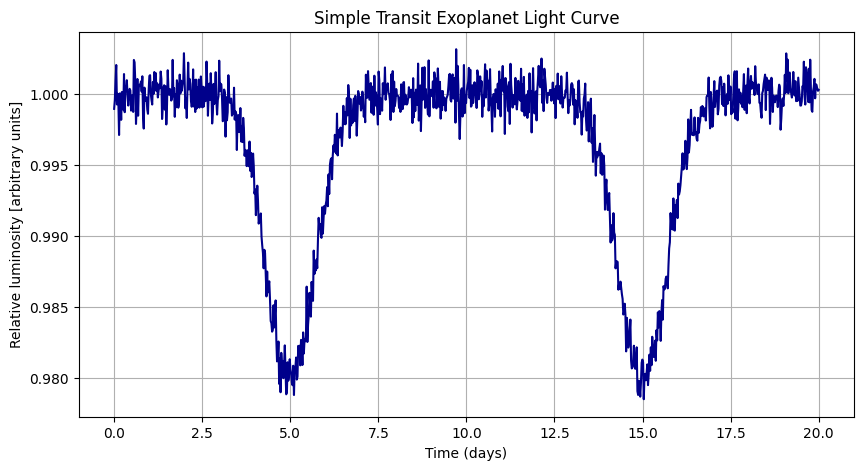

In [55]:
# Function to create a simple light curve of an exoplanetary transit
def exoplanet_light_curve(time, period, depth, phase_shift=0, noise_level=0):
    """
    time: time array
    period: period of exoplanet in days
    depth: transit depth (decrease in luminosity)
    phase_shift: phase shift in time
    noise_level: added noise level (simulate measurement errors)
    """
    # Phase of exoplanet
    phase = ((time + phase_shift) % period) / period

    # Generate the light curve with a simple transit
    # During the transit, the phase is close to 0 (or 1), light decreases
    light_curve = 1 - depth * (np.exp(-((phase - 0.5)**2) / 0.01)) # Soften the edge

    # Agregar ruido a la señal (opcional)
    noise = np.random.normal(0, noise_level, size=len(time))

    return light_curve + noise

# Function to plot the light curve
def plot_light_curve(time, light_curve, title="Exoplanet Light Curve"):

    plt.figure(figsize=(10, 5))
    plt.plot(time, light_curve, color='darkblue')
    plt.xlabel('Time (days)')
    plt.ylabel('Relative luminosity [arbitrary units]')
    plt.title(title)
    plt.grid()
    plt.show()


# Simuled time
time = np.linspace(0, 20, 1000)  # 20 days, 1000 sampling points

# Exoplanet system parameters
period = 10          # Period of exoplanet: 10 days
depth = 0.02         # Depth transit: 2%
phase_shift = 0      # No phase shift
noise_level = 0.001  # Add a small noise level to simulate measurements

# Creating light curve
light_curve = exoplanet_light_curve(time, period, depth, phase_shift, noise_level)

# Graphing light curve
plot_light_curve(time, light_curve, title="Simple Transit Exoplanet Light Curve")


## **Light curve extracting from TESS database**

In [56]:
%%capture
!pip install lightkurve
!pip install astropy==5.1

In [57]:
import lightkurve as lk
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astropy import units as u
from astropy.timeseries import implementations
from astropy.time import Time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import warnings
warnings.filterwarnings("ignore")

In [58]:
#An example for LTT 9779 or Uúba-Cuacoá system
search_result = lk.search_lightcurve('CD-38 15670', mission="TESS", author='SPOC', exptime=120)
lc_collection = search_result.download_all( ).PDCSAP_FLUX

In [59]:
p = lc_collection[0].remove_nans().to_periodogram(method='LombScargle')

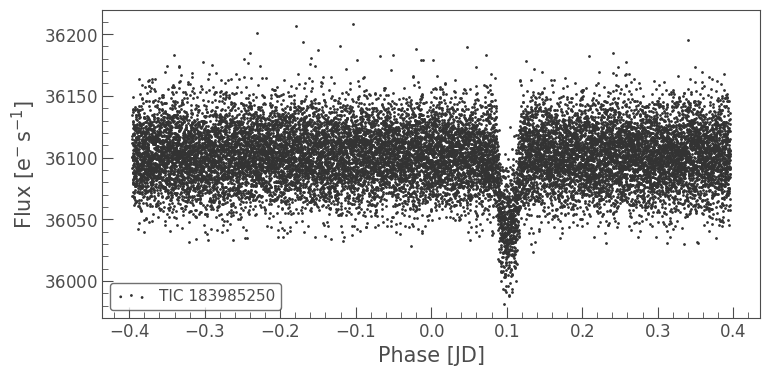

In [60]:
lc_collection[0].fold(p.period_at_max_power.value).scatter();